In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scanpy as sc
import anndata as ad
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.pyplot import rc_context
import os
import seaborn as sns
import importlib
import re

In [2]:
import degSummary
from scanpyColor import godsnot_102

In [3]:
from adjustText import adjust_text

In [4]:
from scipy.stats import ranksums

In [5]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150, facecolor='white', dpi_save=600)

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.13.1 pandas==2.2.1 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.12


In [6]:
sns.set_theme(style="ticks", palette='deep')

---

figure4Folder# Load data

In [7]:
os.chdir('../../')

In [8]:
pwd

'/data/tcl/Project/ADFCA'

In [9]:
figureFolder = 'Analysis/Figure'
os.makedirs(figureFolder, exist_ok=True)

In [10]:
figure4Folder=f'{figureFolder}/Figure4'
os.makedirs(figure4Folder, exist_ok=True)
figure4PicFolder=f'{figure4Folder}/pic'
os.makedirs(figure4PicFolder, exist_ok=True)

In [11]:
apoe4Folder=f'{figure4Folder}/2024_nature_APOE4'
os.makedirs(apoe4Folder, exist_ok=True)

In [12]:
tsai2023_Folder=f'{figure4Folder}/2023_Cell_Tsai'
os.makedirs(tsai2023_Folder, exist_ok=True)

tsai2023Pic_Folder=f'{tsai2023_Folder}/pic'
os.makedirs(tsai2023Pic_Folder, exist_ok=True)

# tsai2023 data

## Load data

### combine excitatiory neurons

In [13]:
adata_exc1 = sc.read('/data/tcl/dataset/Human_AD/2023_Cell_Tsai/rds/Excitatory_neurons_set1.h5ad')
for col in adata_exc1.obs.columns: adata_exc1.obs[col] = adata_exc1.obs[col].astype(str)
adata_exc1.var.index = [str(var) for var in adata_exc1.var_names]
adata_exc1

AnnData object with n_obs × n_vars = 296936 × 33538
    obs: 'cell_type_high_resolution', 'subject'

In [14]:
adata_exc2 = sc.read('/data/tcl/dataset/Human_AD/2023_Cell_Tsai/rds/Excitatory_neurons_set2.h5ad')
for col in adata_exc2.obs.columns: adata_exc2.obs[col] = adata_exc2.obs[col].astype(str)
adata_exc2.var.index = [str(var) for var in adata_exc2.var_names]
adata_exc2

AnnData object with n_obs × n_vars = 421529 × 33538
    obs: 'cell_type_high_resolution', 'subject'

In [15]:
adata_exc3 = sc.read('/data/tcl/dataset/Human_AD/2023_Cell_Tsai/rds/Excitatory_neurons_set3.h5ad')
for col in adata_exc3.obs.columns: adata_exc3.obs[col] = adata_exc3.obs[col].astype(str)
adata_exc3.var.index = [str(var) for var in adata_exc3.var_names]
adata_exc3

AnnData object with n_obs × n_vars = 324765 × 33538
    obs: 'cell_type_high_resolution', 'subject'

In [16]:
adata_exc1.var

Empty DataFrame
Columns: []
Index: [MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2, AL627309.4, AL732372.1, OR4F29, AC114498.1, OR4F16, AL669831.2, AL669831.5, FAM87B, LINC00115, FAM41C, AL645608.7, AL645608.3, AL645608.5, AL645608.1, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, AL645608.8, HES4, ISG15, AL645608.2, AGRN, AL645608.9, RNF223, C1orf159, LINC01342, AL390719.2, TTLL10-AS1, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, AL162741.1, UBE2J2, LINC01786, SCNN1D, ACAP3, PUSL1, INTS11, CPTP, TAS1R3, DVL1, MXRA8, AURKAIP1, CCNL2, MRPL20, AL391244.3, ANKRD65, AL391244.2, TMEM88B, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, AL645728.1, FNDC10, AL691432.2, MIB2, MMP23B, CDK11B, FO704657.1, SLC35E2B, CDK11A, SLC35E2A, NADK, GNB1, AL109917.1, CALML6, TMEM52, CFAP74, AL391845.2, GABRD, AL391845.1, PRKCZ, AL590822.2, PRKCZ-AS1, FAAP20, AL590822.1, SKI, MORN1, RER1, PEX10, PLCH2, AL139246.1, AL139246.4, PANK4, HES5, ...]

[33538 rows x 0 columns]

In [18]:
# adata_excAll = adata_exc1.concatenate(adata_exc2, adata_exc3, join='outer') # cause error
adata_excAll = ad.concat([adata_exc1, adata_exc2, adata_exc3], join='outer')
adata_excAll

AnnData object with n_obs × n_vars = 1043230 × 33538
    obs: 'cell_type_high_resolution', 'subject'

In [21]:
adata_excAll.write('/data/tcl/dataset/Human_AD/2023_Cell_Tsai/rds/Excitatory_neurons_all.h5ad')

## Normalize data, HVGs

In [13]:
adata = sc.read('/data/tcl/dataset/Human_AD/2023_Cell_Tsai/rds/Excitatory_neurons_all.h5ad')

In [14]:
# annotate the group of mitochondrial genes as "mt"
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

In [15]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:14)


extracting highly variable genes


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:01:11)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


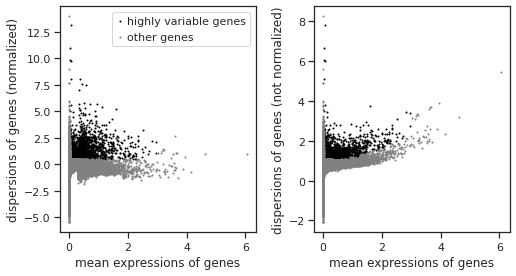

highly_variable
False    29633
True      3905
Name: count, dtype: int64

In [16]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
adata.var['highly_variable'].value_counts()

In [17]:
hvg_L = adata.var[ 
        (adata.var.means > 0.0125) & 
        (adata.var.means <= 3 ) ].dispersions_norm.sort_values(ascending=False)[:2500].index.to_list()
print('hvg #: ', len(hvg_L))
adata.var['highly_variable']= [True if var in hvg_L else False for var in adata.var_names ]
adata.var['highly_variable'].value_counts()

hvg #:  2500


highly_variable
False    31038
True      2500
Name: count, dtype: int64

In [18]:
adata.raw = adata

In [19]:
adata

AnnData object with n_obs × n_vars = 1043230 × 33538
    obs: 'cell_type_high_resolution', 'subject', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [20]:
adata = adata[:, adata.var.highly_variable]

# sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])
sc.pp.scale(adata, max_value=10)

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [21]:
adata

AnnData object with n_obs × n_vars = 1043230 × 2500
    obs: 'cell_type_high_resolution', 'subject', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [22]:
adata.obs

cell_type_high_resolution       subject  \
index                                                            
AACGTTGGTTCAGGCC-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGACCTAGTTAACGA-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGTCTGTCCTCAATT-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGAGTATGACA-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGTCCTTTCTC-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
...                                          ...           ...   
TTGTTCATCGAGGCAA-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTACCAGTAGGCTCC-16-14   Exc L5-6 RORB LINC02196  ROSMAP-37074   
TTTACGTCACAACGCC-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTAGTCCAGCGTTTA-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTGGTTCAAGGCCTC-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   

                        n_genes_by_counts  total_counts  total_counts_mt  \
index                                                                      
AACGTTGGTTCAGGCC-1-0                 5712       16686.0             67.0   
AAGACCTAGTTAACGA-1-0                 3995        9008.0            137.0   
AAGTCTGTCCTCAATT-1-0                 5178       13972.0            244.0   
AATCCAGAGTATGACA-1-0                 5365       14824.0             79.0   
AATCCAGTCCTTTCTC-1-0                 6597       25400.0            294.0   
...                                   ...           ...              ...   
TTGTTCATCGAGGCAA-16-14               8006       45149.0           1673.0   
TTTACCAGTAGGCTCC-16-14               7741       45028.0            799.0   
TTTACGTCACAACGCC-16-14               8142       58577.0            327.0   
TTTAGTCCAGCGTTTA-16-14               9013       70070.0            897.0   
TTTGGTTCAAGGCCTC-16-14               8325       59284.0           1087.0   

                        pct_counts_mt  
index                                  
AACGTTGGTTCAGGCC-1-0         0.401534  
AAGACCTAGTTAACGA-1-0         1.520870  
AAGTCTGTCCTCAATT-1-0         1.746350  
AATCCAGAGTATGACA-1-0         0.532920  
AATCCAGTCCTTTCTC-1-0         1.157480  
...                               ...  
TTGTTCATCGAGGCAA-16-14       3.705508  
TTTACCAGTAGGCTCC-16-14       1.774451  
TTTACGTCACAACGCC-16-14       0.558240  
TTTAGTCCAGCGTTTA-16-14       1.280148  
TTTGGTTCAAGGCCTC-16-14       1.833547  

[1043230 rows x 6 columns]

computing PCA
    on highly variable genes
    with n_comps=150
    finished (0:11:12)


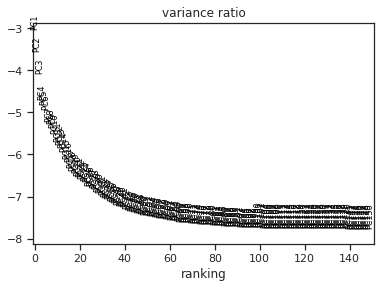

In [23]:
sc.tl.pca(adata, svd_solver="arpack", n_comps=150)
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=150)

In [24]:
adata.write(f'{tsai2023_Folder}/adata_tsai2023_Folder__1.logNor_PCA.h5ad')

## NN to UMAP, annotation: n_neighbors=10, n_pcs=30

### NN to UMAP

In [13]:
adata = sc.read(f'{tsai2023_Folder}/adata_tsai2023_Folder__1.logNor_PCA.h5ad')

In [14]:
nn, npcs = 10, 30

In [15]:
sc.pp.neighbors(adata, n_neighbors=nn, n_pcs=npcs)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:38)


In [16]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:18:06)


In [17]:
sc.tl.leiden(adata, resolution=0.2)

running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:07:23)


In [18]:
sc.tl.tsne(adata, n_jobs=50, n_pcs=npcs)

computing tSNE
    using 'X_pca' with n_pcs = 30
    using sklearn.manifold.TSNE


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/tools/_tsne.py:113: UserWarning: In previous versions of scanpy, calling tsne with n_jobs > 1 would use MulticoreTSNE. Now this uses the scikit-learn version of TSNE by default. If you'd like the old behaviour (which is deprecated), pass 'use_fast_tsne=True'. Note, MulticoreTSNE is not actually faster anymore.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:21:59)


In [19]:
adata.obs

cell_type_high_resolution       subject  \
index                                                            
AACGTTGGTTCAGGCC-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGACCTAGTTAACGA-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGTCTGTCCTCAATT-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGAGTATGACA-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGTCCTTTCTC-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
...                                          ...           ...   
TTGTTCATCGAGGCAA-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTACCAGTAGGCTCC-16-14   Exc L5-6 RORB LINC02196  ROSMAP-37074   
TTTACGTCACAACGCC-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTAGTCCAGCGTTTA-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTGGTTCAAGGCCTC-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   

                        n_genes_by_counts  total_counts  total_counts_mt  \
index                                                                      
AACGTTGGTTCAGGCC-1-0                 5712       16686.0             67.0   
AAGACCTAGTTAACGA-1-0                 3995        9008.0            137.0   
AAGTCTGTCCTCAATT-1-0                 5178       13972.0            244.0   
AATCCAGAGTATGACA-1-0                 5365       14824.0             79.0   
AATCCAGTCCTTTCTC-1-0                 6597       25400.0            294.0   
...                                   ...           ...              ...   
TTGTTCATCGAGGCAA-16-14               8006       45149.0           1673.0   
TTTACCAGTAGGCTCC-16-14               7741       45028.0            799.0   
TTTACGTCACAACGCC-16-14               8142       58577.0            327.0   
TTTAGTCCAGCGTTTA-16-14               9013       70070.0            897.0   
TTTGGTTCAAGGCCTC-16-14               8325       59284.0           1087.0   

                        pct_counts_mt leiden  
index                                         
AACGTTGGTTCAGGCC-1-0         0.401534      1  
AAGACCTAGTTAACGA-1-0         1.520870      1  
AAGTCTGTCCTCAATT-1-0         1.746350      1  
AATCCAGAGTATGACA-1-0         0.532920      1  
AATCCAGTCCTTTCTC-1-0         1.157480      1  
...                               ...    ...  
TTGTTCATCGAGGCAA-16-14       3.705508      5  
TTTACCAGTAGGCTCC-16-14       1.774451     11  
TTTACGTCACAACGCC-16-14       0.558240      5  
TTTAGTCCAGCGTTTA-16-14       1.280148      5  
TTTGGTTCAAGGCCTC-16-14       1.833547      5  

[1043230 rows x 7 columns]

In [62]:
subject_Df = pd.read_csv(f'/data/tcl/dataset/Human_AD/2023_Cell_Tsai/individual_metadata_deidentified.tsv', sep='\t')
subject_Df

subject  msex age_death   pmi  race Pathologic_diagnosis_of_AD
0    ROSMAP-10132     0       90+   7.0     1                        yes
1    ROSMAP-10643     0       90+  13.0     1                        yes
2    ROSMAP-10859     1   (80,85]  14.0     2                        yes
3    ROSMAP-12078     1   (85,90]   3.0     1                        yes
4    ROSMAP-12256     1   (85,90]   4.0     1                        yes
..            ...   ...       ...   ...   ...                        ...
422  ROSMAP-98582     1   (70,75]   8.0     1                         no
423  ROSMAP-98683     0   (85,90]   7.0     1                        yes
424  ROSMAP-99419     0   (75,80]   8.0     1                         no
425  ROSMAP-99585     1       90+   2.0     1                        yes
426  ROSMAP-99981     1       90+   5.0     1                        yes

[427 rows x 6 columns]

In [70]:
n=0
subject_Df.iloc[n, 1:].to_list()

[0, '90+', 7.0, 1, 'yes']

In [71]:
subject_D = {}
for n, subject in enumerate(subject_Df.subject):
    subject_D[subject] = subject_Df.iloc[n, 1:].to_list()

In [80]:
for n, col in enumerate(subject_Df.columns.to_list()[1:]):
    data_L = []
    for  subject in adata.obs.subject:
        data = subject_D[subject][n]
        data_L.append(data)
    
    adata.obs[col] = pd.Categorical(data_L)

In [15]:
adata.obs

cell_type_high_resolution       subject  \
index                                                            
AACGTTGGTTCAGGCC-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGACCTAGTTAACGA-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGTCTGTCCTCAATT-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGAGTATGACA-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGTCCTTTCTC-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
...                                          ...           ...   
TTGTTCATCGAGGCAA-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTACCAGTAGGCTCC-16-14   Exc L5-6 RORB LINC02196  ROSMAP-37074   
TTTACGTCACAACGCC-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTAGTCCAGCGTTTA-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTGGTTCAAGGCCTC-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   

                        n_genes_by_counts  total_counts  total_counts_mt  \
index                                                                      
AACGTTGGTTCAGGCC-1-0                 5712       16686.0             67.0   
AAGACCTAGTTAACGA-1-0                 3995        9008.0            137.0   
AAGTCTGTCCTCAATT-1-0                 5178       13972.0            244.0   
AATCCAGAGTATGACA-1-0                 5365       14824.0             79.0   
AATCCAGTCCTTTCTC-1-0                 6597       25400.0            294.0   
...                                   ...           ...              ...   
TTGTTCATCGAGGCAA-16-14               8006       45149.0           1673.0   
TTTACCAGTAGGCTCC-16-14               7741       45028.0            799.0   
TTTACGTCACAACGCC-16-14               8142       58577.0            327.0   
TTTAGTCCAGCGTTTA-16-14               9013       70070.0            897.0   
TTTGGTTCAAGGCCTC-16-14               8325       59284.0           1087.0   

                        pct_counts_mt leiden msex age_death  pmi race  \
index                                                                   
AACGTTGGTTCAGGCC-1-0         0.401534      1    1   (80,85]  1.0    1   
AAGACCTAGTTAACGA-1-0         1.520870      1    1   (80,85]  1.0    1   
AAGTCTGTCCTCAATT-1-0         1.746350      1    1   (80,85]  1.0    1   
AATCCAGAGTATGACA-1-0         0.532920      1    1   (80,85]  1.0    1   
AATCCAGTCCTTTCTC-1-0         1.157480      1    1   (80,85]  1.0    1   
...                               ...    ...  ...       ...  ...  ...   
TTGTTCATCGAGGCAA-16-14       3.705508      5    0       90+  6.0    1   
TTTACCAGTAGGCTCC-16-14       1.774451     11    0       90+  6.0    1   
TTTACGTCACAACGCC-16-14       0.558240      5    0       90+  6.0    1   
TTTAGTCCAGCGTTTA-16-14       1.280148      5    0       90+  6.0    1   
TTTGGTTCAAGGCCTC-16-14       1.833547      5    0       90+  6.0    1   

                       Pathologic_diagnosis_of_AD  
index                                              
AACGTTGGTTCAGGCC-1-0                           no  
AAGACCTAGTTAACGA-1-0                           no  
AAGTCTGTCCTCAATT-1-0                           no  
AATCCAGAGTATGACA-1-0                           no  
AATCCAGTCCTTTCTC-1-0                           no  
...                                           ...  
TTGTTCATCGAGGCAA-16-14                         no  
TTTACCAGTAGGCTCC-16-14                         no  
TTTACGTCACAACGCC-16-14                         no  
TTTAGTCCAGCGTTTA-16-14                         no  
TTTGGTTCAAGGCCTC-16-14                         no  

[1043230 rows x 12 columns]

In [14]:
batch_Df = pd.read_csv(f'/data/tcl/dataset/Human_AD/2023_Cell_Tsai/batch_mapping_deidentified.tsv', sep='\t')
batch_Df

num         batch         dataset       subject
0      1  SM_171013Tsa  SM_171013Tsa-1  ROSMAP-52226
1      2  SM_171013Tsa  SM_171013Tsa-2  ROSMAP-72912
2      3  SM_171013Tsa  SM_171013Tsa-3  ROSMAP-66835
3      4  SM_171013Tsa  SM_171013Tsa-4  ROSMAP-90257
4      5  SM_171013Tsa  SM_171013Tsa-5  ROSMAP-38740
..   ...           ...             ...           ...
475   44         MRPFC        MRPFC-44  ROSMAP-78104
476   45         MRPFC        MRPFC-45  ROSMAP-17199
477   46         MRPFC        MRPFC-46  ROSMAP-53808
478   47         MRPFC        MRPFC-47  ROSMAP-42444
479   48         MRPFC        MRPFC-48  ROSMAP-51356

[480 rows x 4 columns]

In [15]:
batch_D = dict(zip(batch_Df.subject, batch_Df.batch))

In [18]:
adata.obs['expBatch'] = pd.Categorical([batch_D[subject] for subject in adata.obs.subject])

In [20]:
adata.write(f'{tsai2023_Folder}/adata_tsai2023_Folder__2.NN10_PC30_UMAP.h5ad')

In [21]:
adata.raw.to_adata().write(f'{tsai2023_Folder}/adata_tsai2023_Folder__2.NN10_PC30_UMAP_raw.h5ad')

### Plot candidates

In [13]:
adata = sc.read(f'{tsai2023_Folder}/adata_tsai2023_Folder__2.NN10_PC30_UMAP.h5ad')

In [18]:
# with rc_context({'figure.figsize': (6, 6)}):
sc.pl.umap(adata, color=['APP',], wspace=0.1, frameon=False, cmap='seismic', vmax=5, show=False,
           save=f'_adata_tsai2023__exci__APP.pdf')
sc.pl.umap(adata, color=['MAPT'], wspace=0.1, frameon=False, cmap='seismic', vmax=4.5, show=False, 
           save=f'_adata_tsai2023__exci__MAPT.pdf')

for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{tsai2023Pic_Folder}/{x}')

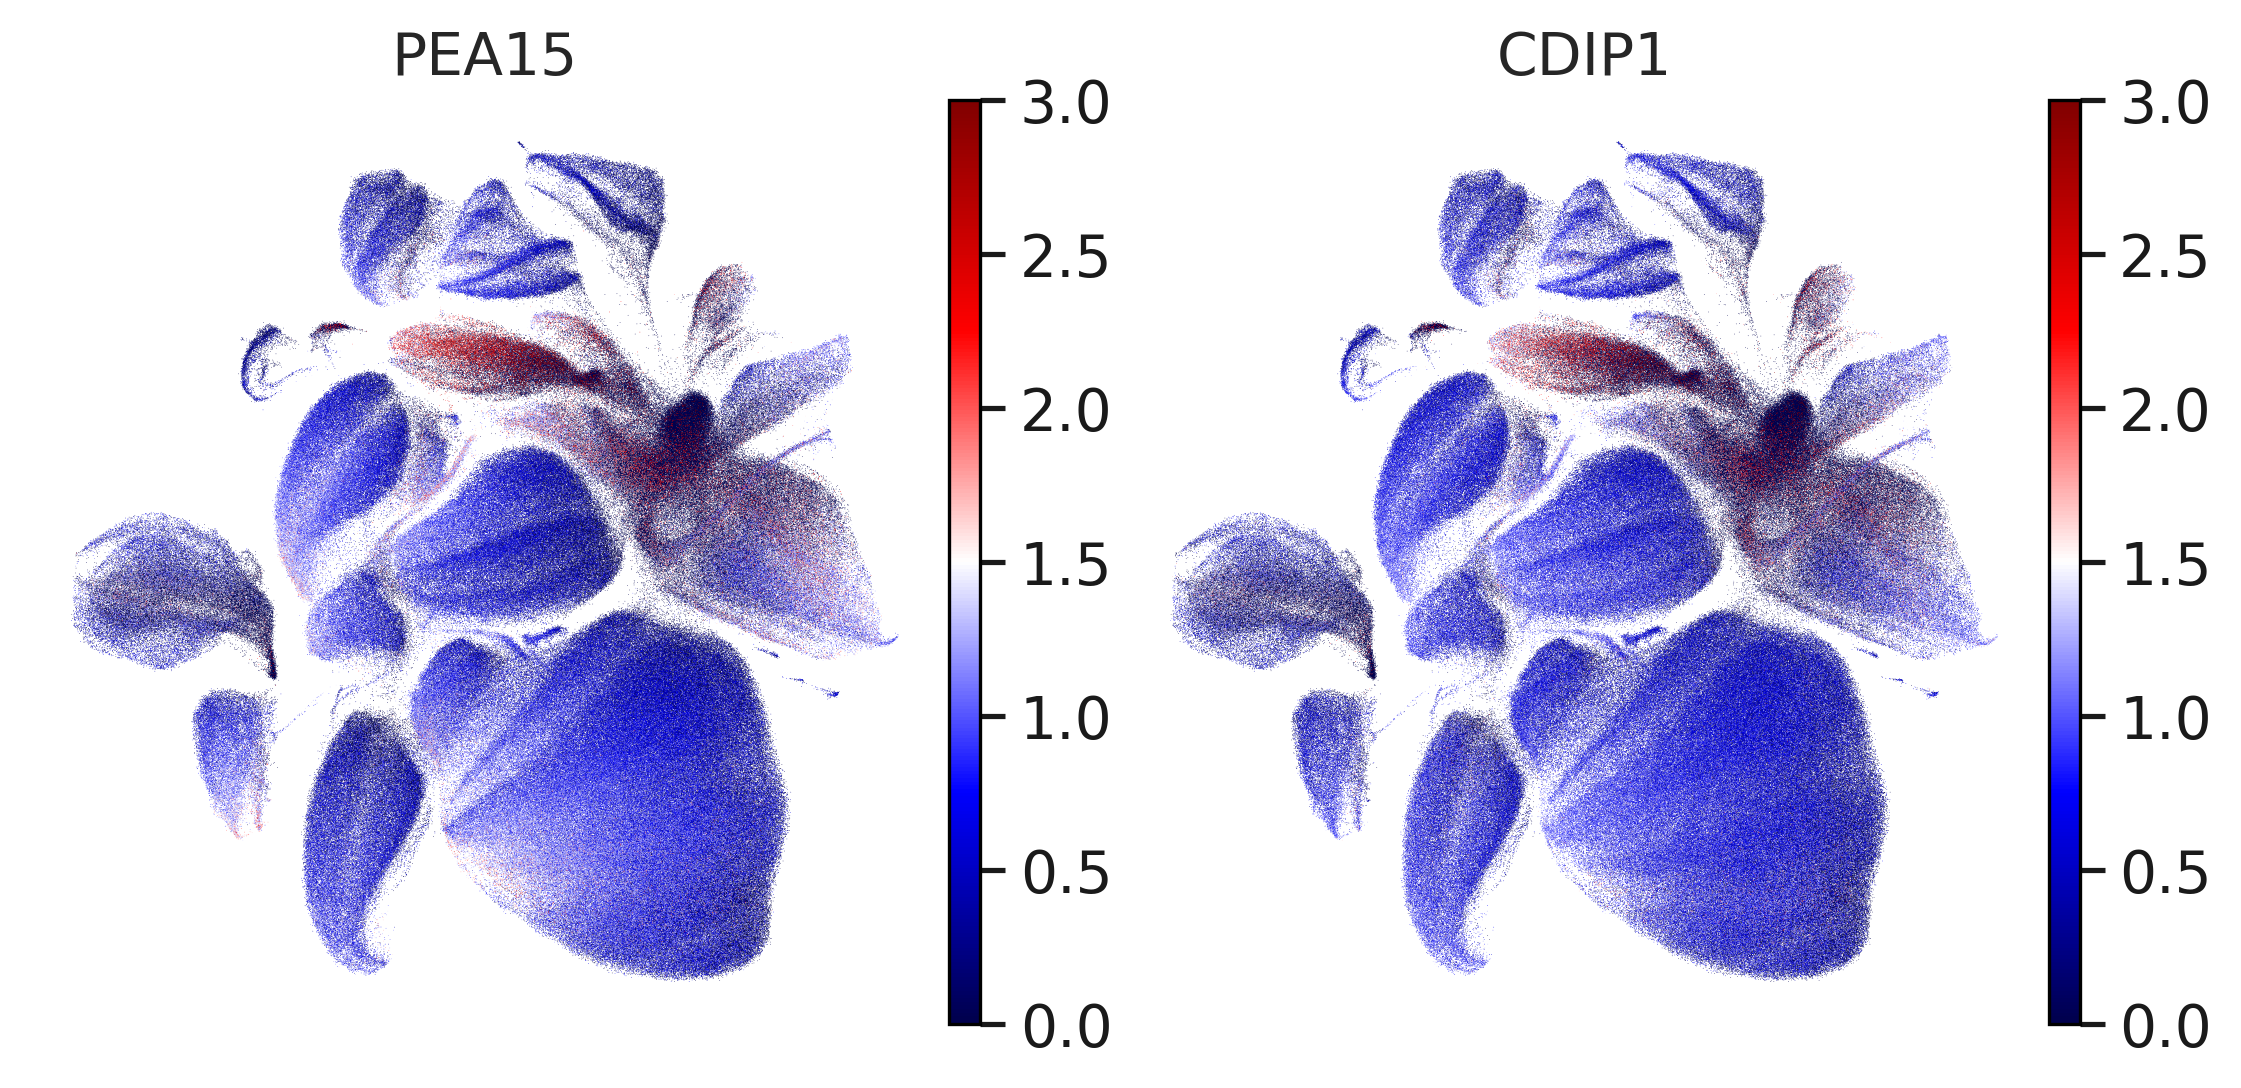

In [20]:
sc.pl.umap(adata, color=['LDHA', 'LDHB'], wspace=0.1, frameon=False, cmap='seismic', vmax=3.5, show=False,
           save=f'_adata_tsai2023__exci__LDHA_LDHB.pdf')
sc.pl.umap(adata, color=['NFE2L1', 'ATF4',], wspace=0.1, frameon=False, cmap='seismic', vmax = 2.5, show=False,
           save=f'_adata_tsai2023__exci__NFE2L1_ATF4.pdf')
sc.pl.umap(adata, color=['PEA15', 'CDIP1'], wspace=0.1, frameon=False, cmap='seismic', vmax = 3,
           save=f'_adata_tsai2023__exci__PEA15_CDIP1.pdf')

for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{tsai2023Pic_Folder}/{x}')

### Increase leiden resolution

In [13]:
adata = sc.read(f'{tsai2023_Folder}/adata_tsai2023_Folder__2.NN10_PC30_UMAP.h5ad')

In [23]:
for leiden in np.arange(0.4, 1.2, 0.2): 
    leiden = '%.1f' % leiden
    print(leiden) 
    # print(type(leiden))
    sc.tl.leiden(adata, resolution=float(leiden), key_added=f'leiden_{leiden}')

0.4
running Leiden clustering
    finished: found 24 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:11:27)
0.6
running Leiden clustering
    finished: found 27 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:13:51)
0.8
running Leiden clustering
    finished: found 32 clusters and added
    'leiden_0.8', the cluster labels (adata.obs, categorical) (0:10:19)
1.0
running Leiden clustering
    finished: found 40 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:29:06)


In [ ]:
for leiden in np.arange(1.2, 2.2, 0.2): 
    leiden = '%.1f' % leiden
    print(leiden) 
    # print(type(leiden))
    sc.tl.leiden(adata, resolution=float(leiden), key_added=f'leiden_{leiden}')

1.2
running Leiden clustering
    finished: found 44 clusters and added
    'leiden_1.2', the cluster labels (adata.obs, categorical) (0:20:23)
1.4
running Leiden clustering
    finished: found 49 clusters and added
    'leiden_1.4', the cluster labels (adata.obs, categorical) (0:10:09)
1.6
running Leiden clustering
    finished: found 50 clusters and added
    'leiden_1.6', the cluster labels (adata.obs, categorical) (0:12:36)
1.8
running Leiden clustering


In [ ]:
adata.write(f'{tsai2023_Folder}/adata_tsai2023_Folder__3.NN10_PC30_UMAP_more_leiden.h5ad')

In [22]:
adata.raw.to_adata().write(f'{tsai2023_Folder}/adata_tsai2023_Folder__3.NN10_PC30_UMAP_more_leiden_raw.h5ad')

## Plot

In [13]:
adata = sc.read(f'{tsai2023_Folder}/adata_tsai2023_Folder__3.NN10_PC30_UMAP_more_leiden.h5ad')

In [14]:
adata

AnnData object with n_obs × n_vars = 1043230 × 2500
    obs: 'cell_type_high_resolution', 'subject', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'msex', 'age_death', 'pmi', 'race', 'Pathologic_diagnosis_of_AD', 'expBatch', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.2', 'leiden_1.4', 'leiden_1.6', 'leiden_1.8', 'leiden_2.0', 'leiden_2.2'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [15]:
adata.obs

cell_type_high_resolution       subject  \
index                                                            
AACGTTGGTTCAGGCC-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGACCTAGTTAACGA-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGTCTGTCCTCAATT-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGAGTATGACA-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGTCCTTTCTC-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
...                                          ...           ...   
TTGTTCATCGAGGCAA-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTACCAGTAGGCTCC-16-14   Exc L5-6 RORB LINC02196  ROSMAP-37074   
TTTACGTCACAACGCC-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTAGTCCAGCGTTTA-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTGGTTCAAGGCCTC-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   

                        n_genes_by_counts  total_counts  total_counts_mt  \
index                                                                      
AACGTTGGTTCAGGCC-1-0                 5712       16686.0             67.0   
AAGACCTAGTTAACGA-1-0                 3995        9008.0            137.0   
AAGTCTGTCCTCAATT-1-0                 5178       13972.0            244.0   
AATCCAGAGTATGACA-1-0                 5365       14824.0             79.0   
AATCCAGTCCTTTCTC-1-0                 6597       25400.0            294.0   
...                                   ...           ...              ...   
TTGTTCATCGAGGCAA-16-14               8006       45149.0           1673.0   
TTTACCAGTAGGCTCC-16-14               7741       45028.0            799.0   
TTTACGTCACAACGCC-16-14               8142       58577.0            327.0   
TTTAGTCCAGCGTTTA-16-14               9013       70070.0            897.0   
TTTGGTTCAAGGCCTC-16-14               8325       59284.0           1087.0   

                        pct_counts_mt leiden msex age_death  pmi  ...  \
index                                                             ...   
AACGTTGGTTCAGGCC-1-0         0.401534      1    1   (80,85]  1.0  ...   
AAGACCTAGTTAACGA-1-0         1.520870      1    1   (80,85]  1.0  ...   
AAGTCTGTCCTCAATT-1-0         1.746350      1    1   (80,85]  1.0  ...   
AATCCAGAGTATGACA-1-0         0.532920      1    1   (80,85]  1.0  ...   
AATCCAGTCCTTTCTC-1-0         1.157480      1    1   (80,85]  1.0  ...   
...                               ...    ...  ...       ...  ...  ...   
TTGTTCATCGAGGCAA-16-14       3.705508      5    0       90+  6.0  ...   
TTTACCAGTAGGCTCC-16-14       1.774451     11    0       90+  6.0  ...   
TTTACGTCACAACGCC-16-14       0.558240      5    0       90+  6.0  ...   
TTTAGTCCAGCGTTTA-16-14       1.280148      5    0       90+  6.0  ...   
TTTGGTTCAAGGCCTC-16-14       1.833547      5    0       90+  6.0  ...   

                       leiden_0.4 leiden_0.6 leiden_0.8 leiden_1.0 leiden_1.2  \
index                                                                           
AACGTTGGTTCAGGCC-1-0            6          4          4          3          3   
AAGACCTAGTTAACGA-1-0            6          4          4          3          3   
AAGTCTGTCCTCAATT-1-0            6          4          4          3          3   
AATCCAGAGTATGACA-1-0            6          4          4          3          3   
AATCCAGTCCTTTCTC-1-0            6          4          4          3          3   
...                           ...        ...        ...        ...        ...   
TTGTTCATCGAGGCAA-16-14          7          8          5         11         10   
TTTACCAGTAGGCTCC-16-14         15         16         19         22         24   
TTTACGTCACAACGCC-16-14          7          8          5         11         10   
TTTAGTCCAGCGTTTA-16-14          7          8          5         11         10   
TTTGGTTCAAGGCCTC-16-14          7          8          5         11         10   

                       leiden_1.4 leiden_1.6 leiden_1.8 leiden_2.0 leiden_2.2  
index                                                                          
AACGTTGGTTC

In [16]:
adata.obs['annotation_broad'] = pd.Categorical(['LDH-high cluster' if leiden == '15' else 'Exc neuron' for leiden in adata.obs['leiden_1.0']])

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


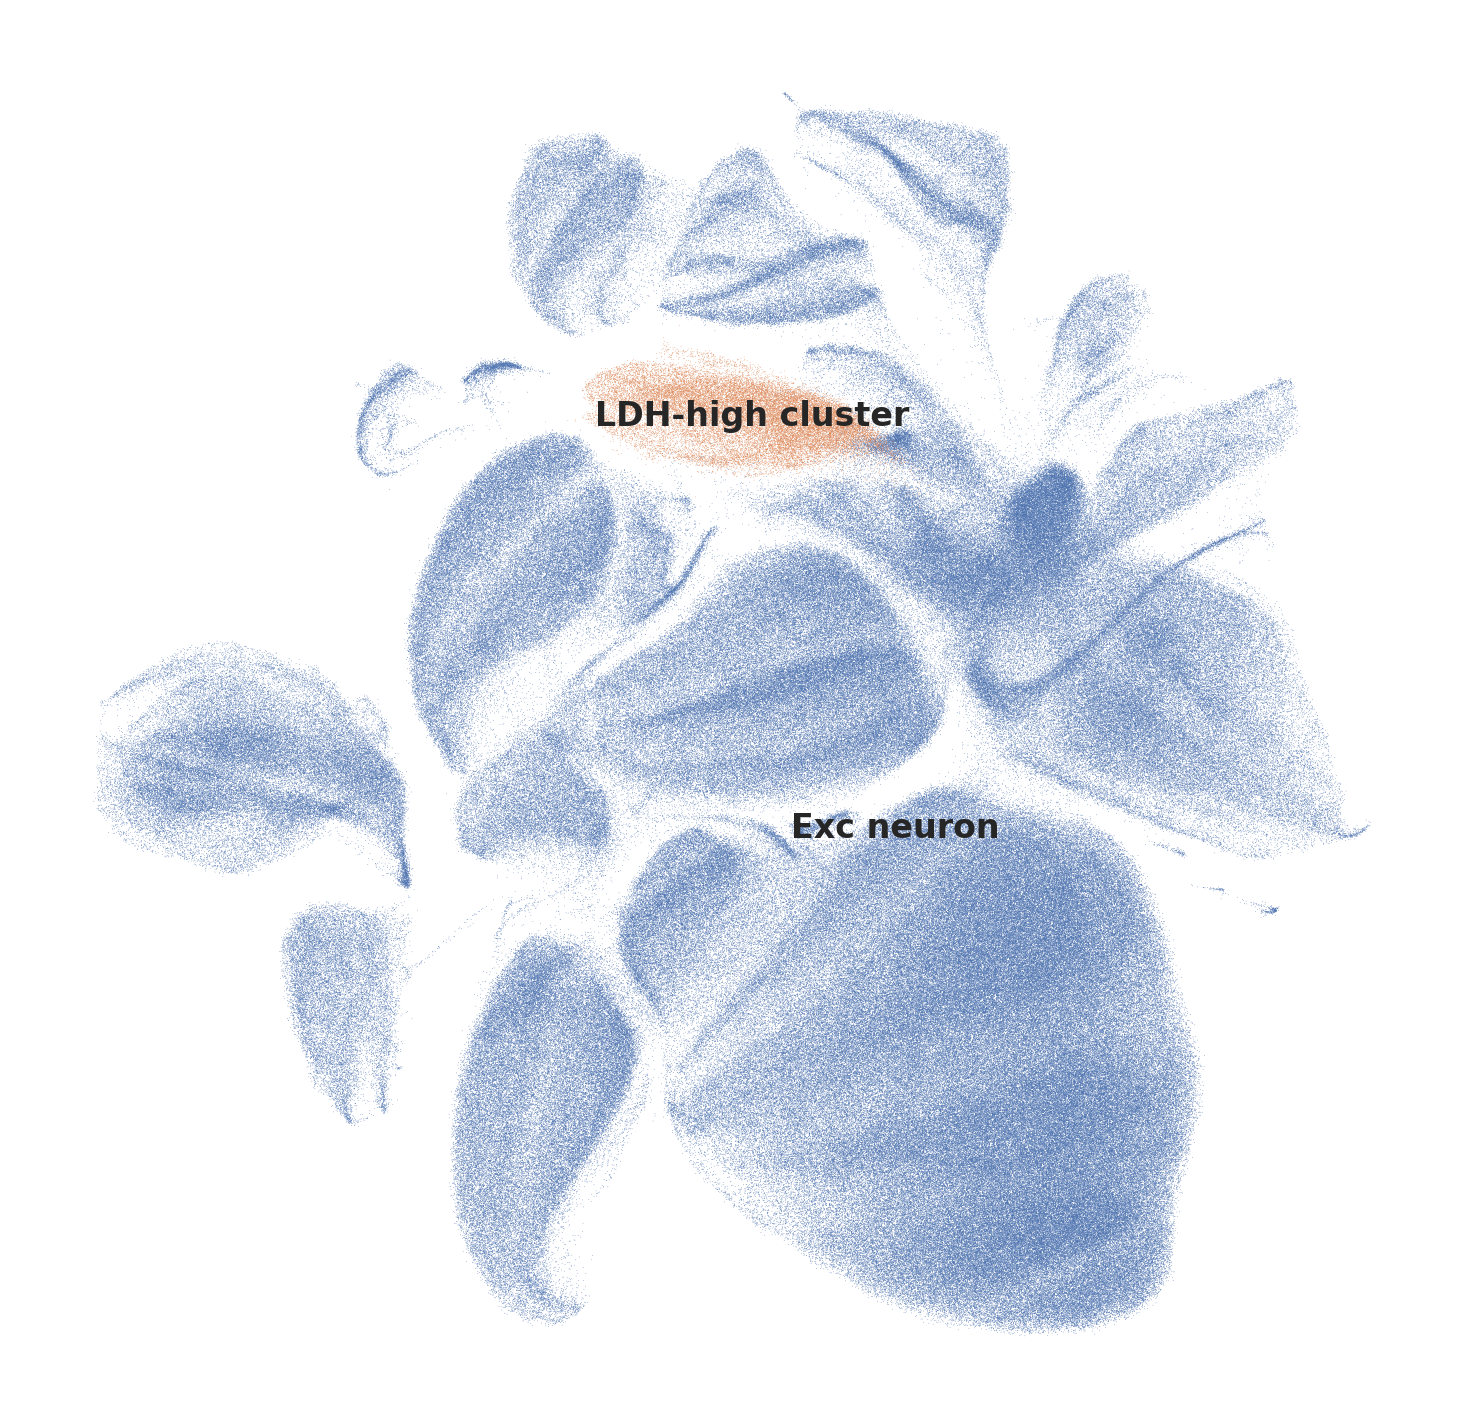

In [20]:
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(adata, color=['annotation_broad'], frameon=False, legend_loc='on data', legend_fontsize=8, title='',
               save=f'_adata_tsai2023__exci__annotation_broad.pdf')

for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{tsai2023Pic_Folder}/{x}')

In [21]:
adata.write(f'{tsai2023_Folder}/adata_tsai2023_Folder__3.NN10_PC30_UMAP_more_leiden.h5ad')

In [22]:
adata.raw.to_adata().write(f'{tsai2023_Folder}/adata_tsai2023_Folder__3.NN10_PC30_UMAP_more_leiden_raw.h5ad')

## Output annotation

In [13]:
adata = sc.read(f'{tsai2023_Folder}/adata_tsai2023_Folder__3.NN10_PC30_UMAP_more_leiden.h5ad')

In [14]:
adata

AnnData object with n_obs × n_vars = 1043230 × 2500
    obs: 'cell_type_high_resolution', 'subject', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'msex', 'age_death', 'pmi', 'race', 'Pathologic_diagnosis_of_AD', 'expBatch', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.2', 'leiden_1.4', 'leiden_1.6', 'leiden_1.8', 'leiden_2.0', 'leiden_2.2', 'annotation_broad'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'annotation_broad_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [15]:
adata.obs

cell_type_high_resolution       subject  \
index                                                            
AACGTTGGTTCAGGCC-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGACCTAGTTAACGA-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGTCTGTCCTCAATT-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGAGTATGACA-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGTCCTTTCTC-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
...                                          ...           ...   
TTGTTCATCGAGGCAA-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTACCAGTAGGCTCC-16-14   Exc L5-6 RORB LINC02196  ROSMAP-37074   
TTTACGTCACAACGCC-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTAGTCCAGCGTTTA-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTGGTTCAAGGCCTC-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   

                        n_genes_by_counts  total_counts  total_counts_mt  \
index                                                                      
AACGTTGGTTCAGGCC-1-0                 5712       16686.0             67.0   
AAGACCTAGTTAACGA-1-0                 3995        9008.0            137.0   
AAGTCTGTCCTCAATT-1-0                 5178       13972.0            244.0   
AATCCAGAGTATGACA-1-0                 5365       14824.0             79.0   
AATCCAGTCCTTTCTC-1-0                 6597       25400.0            294.0   
...                                   ...           ...              ...   
TTGTTCATCGAGGCAA-16-14               8006       45149.0           1673.0   
TTTACCAGTAGGCTCC-16-14               7741       45028.0            799.0   
TTTACGTCACAACGCC-16-14               8142       58577.0            327.0   
TTTAGTCCAGCGTTTA-16-14               9013       70070.0            897.0   
TTTGGTTCAAGGCCTC-16-14               8325       59284.0           1087.0   

                        pct_counts_mt leiden msex age_death  pmi  ...  \
index                                                             ...   
AACGTTGGTTCAGGCC-1-0         0.401534      1    1   (80,85]  1.0  ...   
AAGACCTAGTTAACGA-1-0         1.520870      1    1   (80,85]  1.0  ...   
AAGTCTGTCCTCAATT-1-0         1.746350      1    1   (80,85]  1.0  ...   
AATCCAGAGTATGACA-1-0         0.532920      1    1   (80,85]  1.0  ...   
AATCCAGTCCTTTCTC-1-0         1.157480      1    1   (80,85]  1.0  ...   
...                               ...    ...  ...       ...  ...  ...   
TTGTTCATCGAGGCAA-16-14       3.705508      5    0       90+  6.0  ...   
TTTACCAGTAGGCTCC-16-14       1.774451     11    0       90+  6.0  ...   
TTTACGTCACAACGCC-16-14       0.558240      5    0       90+  6.0  ...   
TTTAGTCCAGCGTTTA-16-14       1.280148      5    0       90+  6.0  ...   
TTTGGTTCAAGGCCTC-16-14       1.833547      5    0       90+  6.0  ...   

                       leiden_0.6 leiden_0.8 leiden_1.0 leiden_1.2 leiden_1.4  \
index                                                                           
AACGTTGGTTCAGGCC-1-0            4          4          3          3          3   
AAGACCTAGTTAACGA-1-0            4          4          3          3          3   
AAGTCTGTCCTCAATT-1-0            4          4          3          3          3   
AATCCAGAGTATGACA-1-0            4          4          3          3          3   
AATCCAGTCCTTTCTC-1-0            4          4          3          3          3   
...                           ...        ...        ...        ...        ...   
TTGTTCATCGAGGCAA-16-14          8          5         11         10         11   
TTTACCAGTAGGCTCC-16-14         16         19         22         24         22   
TTTACGTCACAACGCC-16-14          8          5         11         10         11   
TTTAGTCCAGCGTTTA-16-14          8          5         11         10         11   
TTTGGTTCAAGGCCTC-16-14          8          5         11         10         11   

                       leiden_1.6 leiden_1.8 leiden_2.0 leiden_2.2  \
index                                                                
AACGTTGGTTCAGGCC-1-0           

In [16]:
umap_Df = pd.DataFrame(adata.obsm['X_umap'])
umap_Df.columns = ['X_umap_1', 'X_umap_2']
umap_Df

X_umap_1  X_umap_2
0        19.036030  1.731285
1        19.978964  2.527442
2        19.730978  2.277107
3        19.028633  2.169793
4        18.054543  0.868571
...            ...       ...
1043225   1.164150  4.306516
1043226   3.334787 -0.463895
1043227   3.277282  7.612643
1043228   1.240779  6.053260
1043229   2.373404  6.397882

[1043230 rows x 2 columns]

In [17]:
adata.obs['X_umap_1'] = umap_Df['X_umap_1'].to_list()
adata.obs['X_umap_2'] = umap_Df['X_umap_2'].to_list()

In [18]:
adata.obs

cell_type_high_resolution       subject  \
index                                                            
AACGTTGGTTCAGGCC-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGACCTAGTTAACGA-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGTCTGTCCTCAATT-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGAGTATGACA-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGTCCTTTCTC-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
...                                          ...           ...   
TTGTTCATCGAGGCAA-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTACCAGTAGGCTCC-16-14   Exc L5-6 RORB LINC02196  ROSMAP-37074   
TTTACGTCACAACGCC-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTAGTCCAGCGTTTA-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTGGTTCAAGGCCTC-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   

                        n_genes_by_counts  total_counts  total_counts_mt  \
index                                                                      
AACGTTGGTTCAGGCC-1-0                 5712       16686.0             67.0   
AAGACCTAGTTAACGA-1-0                 3995        9008.0            137.0   
AAGTCTGTCCTCAATT-1-0                 5178       13972.0            244.0   
AATCCAGAGTATGACA-1-0                 5365       14824.0             79.0   
AATCCAGTCCTTTCTC-1-0                 6597       25400.0            294.0   
...                                   ...           ...              ...   
TTGTTCATCGAGGCAA-16-14               8006       45149.0           1673.0   
TTTACCAGTAGGCTCC-16-14               7741       45028.0            799.0   
TTTACGTCACAACGCC-16-14               8142       58577.0            327.0   
TTTAGTCCAGCGTTTA-16-14               9013       70070.0            897.0   
TTTGGTTCAAGGCCTC-16-14               8325       59284.0           1087.0   

                        pct_counts_mt leiden msex age_death  pmi  ...  \
index                                                             ...   
AACGTTGGTTCAGGCC-1-0         0.401534      1    1   (80,85]  1.0  ...   
AAGACCTAGTTAACGA-1-0         1.520870      1    1   (80,85]  1.0  ...   
AAGTCTGTCCTCAATT-1-0         1.746350      1    1   (80,85]  1.0  ...   
AATCCAGAGTATGACA-1-0         0.532920      1    1   (80,85]  1.0  ...   
AATCCAGTCCTTTCTC-1-0         1.157480      1    1   (80,85]  1.0  ...   
...                               ...    ...  ...       ...  ...  ...   
TTGTTCATCGAGGCAA-16-14       3.705508      5    0       90+  6.0  ...   
TTTACCAGTAGGCTCC-16-14       1.774451     11    0       90+  6.0  ...   
TTTACGTCACAACGCC-16-14       0.558240      5    0       90+  6.0  ...   
TTTAGTCCAGCGTTTA-16-14       1.280148      5    0       90+  6.0  ...   
TTTGGTTCAAGGCCTC-16-14       1.833547      5    0       90+  6.0  ...   

                       leiden_1.0 leiden_1.2 leiden_1.4 leiden_1.6 leiden_1.8  \
index                                                                           
AACGTTGGTTCAGGCC-1-0            3          3          3          3         15   
AAGACCTAGTTAACGA-1-0            3          3          3          3         15   
AAGTCTGTCCTCAATT-1-0            3          3          3          3         15   
AATCCAGAGTATGACA-1-0            3          3          3          3         15   
AATCCAGTCCTTTCTC-1-0            3          3          3          3         15   
...                           ...        ...        ...        ...        ...   
TTGTTCATCGAGGCAA-16-14         11         10         11         25         24   
TTTACCAGTAGGCTCC-16-14         22         24         22         24         23   
TTTACGTCACAACGCC-16-14         11         10         11         30         31   
TTTAGTCCAGCGTTTA-16-14         11         10         11         25         24   
TTTGGTTCAAGGCCTC-16-14         11         10         11         30         31   

                       leiden_2.0 leiden_2.2 annotation_broad   X_umap_1  \
index                                                                      
AACGTTGGTTCAGGCC-1-

In [19]:
adata.obs.to_csv(f'{tsai2023_Folder}/adata_tsai2023_Folder__3.NN10_PC30_UMAP_more_leiden_obs.csv')

# Annotate LDH-high cluster and combine Exci. neuron with Inhi. neuron datasets

## combine cells

In [13]:
adata_exci = sc.read(f'{tsai2023_Folder}/adata_tsai2023_Folder__0.logNor.h5ad')

In [15]:
adata_exci.obs = pd.read_csv(f'{tsai2023_Folder}/adata_tsai2023_Folder__3.NN10_PC30_UMAP_more_leiden_obs.csv', index_col=0)
adata_exci.obs

cell_type_high_resolution       subject  \
index                                                            
AACGTTGGTTCAGGCC-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGACCTAGTTAACGA-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGTCTGTCCTCAATT-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGAGTATGACA-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGTCCTTTCTC-1-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
...                                          ...           ...   
TTGTTCATCGAGGCAA-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTACCAGTAGGCTCC-16-14   Exc L5-6 RORB LINC02196  ROSMAP-37074   
TTTACGTCACAACGCC-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTAGTCCAGCGTTTA-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   
TTTGGTTCAAGGCCTC-16-14        Exc L6 THEMIS NFIA  ROSMAP-37074   

                        n_genes_by_counts  total_counts  total_counts_mt  \
index                                                                      
AACGTTGGTTCAGGCC-1-0                 5712       16686.0             67.0   
AAGACCTAGTTAACGA-1-0                 3995        9008.0            137.0   
AAGTCTGTCCTCAATT-1-0                 5178       13972.0            244.0   
AATCCAGAGTATGACA-1-0                 5365       14824.0             79.0   
AATCCAGTCCTTTCTC-1-0                 6597       25400.0            294.0   
...                                   ...           ...              ...   
TTGTTCATCGAGGCAA-16-14               8006       45149.0           1673.0   
TTTACCAGTAGGCTCC-16-14               7741       45028.0            799.0   
TTTACGTCACAACGCC-16-14               8142       58577.0            327.0   
TTTAGTCCAGCGTTTA-16-14               9013       70070.0            897.0   
TTTGGTTCAAGGCCTC-16-14               8325       59284.0           1087.0   

                        pct_counts_mt  leiden  msex age_death  pmi  ...  \
index                                                               ...   
AACGTTGGTTCAGGCC-1-0         0.401534       1     1   (80,85]  1.0  ...   
AAGACCTAGTTAACGA-1-0         1.520870       1     1   (80,85]  1.0  ...   
AAGTCTGTCCTCAATT-1-0         1.746350       1     1   (80,85]  1.0  ...   
AATCCAGAGTATGACA-1-0         0.532920       1     1   (80,85]  1.0  ...   
AATCCAGTCCTTTCTC-1-0         1.157480       1     1   (80,85]  1.0  ...   
...                               ...     ...   ...       ...  ...  ...   
TTGTTCATCGAGGCAA-16-14       3.705508       5     0       90+  6.0  ...   
TTTACCAGTAGGCTCC-16-14       1.774452      11     0       90+  6.0  ...   
TTTACGTCACAACGCC-16-14       0.558240       5     0       90+  6.0  ...   
TTTAGTCCAGCGTTTA-16-14       1.280148       5     0       90+  6.0  ...   
TTTGGTTCAAGGCCTC-16-14       1.833547       5     0       90+  6.0  ...   

                        leiden_1.0 leiden_1.2 leiden_1.4  leiden_1.6  \
index                                                                  
AACGTTGGTTCAGGCC-1-0             3          3          3           3   
AAGACCTAGTTAACGA-1-0             3          3          3           3   
AAGTCTGTCCTCAATT-1-0             3          3          3           3   
AATCCAGAGTATGACA-1-0             3          3          3           3   
AATCCAGTCCTTTCTC-1-0             3          3          3           3   
...                            ...        ...        ...         ...   
TTGTTCATCGAGGCAA-16-14          11         10         11          25   
TTTACCAGTAGGCTCC-16-14          22         24         22          24   
TTTACGTCACAACGCC-16-14          11         10         11          30   
TTTAGTCCAGCGTTTA-16-14          11         10         11          25   
TTTGGTTCAAGGCCTC-16-14          11         10         11          30   

                        leiden_1.8  leiden_2.0  leiden_2.2  annotation_broad  \
index                                                                          
AACGTTGGTTCAGGCC-1-0            15          15          10        Exc neuron   
AAGACCTAGTTAACGA-1-0  

In [16]:
adata_inhi = sc.read(f'/data/tcl/dataset/Human_AD/2023_Cell_Tsai/rds/Inhibitory_neurons_metadata.h5ad')
adata_inhi

AnnData object with n_obs × n_vars = 329699 × 33538
    obs: 'cell_type_high_resolution', 'subject', 'msex', 'age_death', 'pmi', 'race', 'Pathologic_diagnosis_of_AD', 'cellType_pathology'
    obsm: 'X_umap'
    layers: 'counts'

In [17]:
# adata_exci.obs['annotation_broad'] = pd.Categorical(['LDH-high cluster' if leiden == '15' else 'Exc neuron' for leiden in adata_exci.obs.leiden])
adata_inhi.obs['annotation_broad'] = 'Inh neuron'

In [18]:
adata_exci.obs.annotation_broad.value_counts()

annotation_broad
Exc neuron          1014574
LDH-high cluster      28656
Name: count, dtype: int64

In [19]:
adata_exci = adata_exci.concatenate(adata_inhi, join='outer')
adata_exci

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/merge.py:1015: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  concat_indices = concat_indices.str.cat(label_col.map(str), sep=index_unique)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/_core/merge.py:1015: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Plea

AnnData object with n_obs × n_vars = 1372929 × 33538
    obs: 'cell_type_high_resolution', 'subject', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'msex', 'age_death', 'pmi', 'race', 'Pathologic_diagnosis_of_AD', 'expBatch', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.2', 'leiden_1.4', 'leiden_1.6', 'leiden_1.8', 'leiden_2.0', 'leiden_2.2', 'annotation_broad', 'X_umap_1', 'X_umap_2', 'cellType_pathology', 'batch'
    var: 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0'
    obsm: 'X_umap'
    layers: 'counts'

In [20]:
adata_exci.obs

cell_type_high_resolution       subject  \
index                                                              
AACGTTGGTTCAGGCC-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGACCTAGTTAACGA-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGTCTGTCCTCAATT-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGAGTATGACA-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGTCCTTTCTC-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
...                                            ...           ...   
TTGGGATTCCTAACAG-16-14-1            Inh VIP ABI3BP  ROSMAP-37074   
TTGTGTTTCATCACCC-16-14-1            Inh PVALB HTR4  ROSMAP-37074   
TTTACCAAGCACTCCG-16-14-1            Inh L6 SST NPY  ROSMAP-37074   
TTTCACAAGCTAGATA-16-14-1            Inh PVALB HTR4  ROSMAP-37074   
TTTCAGTGTGGTAATA-16-14-1         Inh L3-5 SST MAFB  ROSMAP-37074   

                          n_genes_by_counts  total_counts  total_counts_mt  \
index                                                                        
AACGTTGGTTCAGGCC-1-0-0               5712.0       16686.0             67.0   
AAGACCTAGTTAACGA-1-0-0               3995.0        9008.0            137.0   
AAGTCTGTCCTCAATT-1-0-0               5178.0       13972.0            244.0   
AATCCAGAGTATGACA-1-0-0               5365.0       14824.0             79.0   
AATCCAGTCCTTTCTC-1-0-0               6597.0       25400.0            294.0   
...                                     ...           ...              ...   
TTGGGATTCCTAACAG-16-14-1                NaN           NaN              NaN   
TTGTGTTTCATCACCC-16-14-1                NaN           NaN              NaN   
TTTACCAAGCACTCCG-16-14-1                NaN           NaN              NaN   
TTTCACAAGCTAGATA-16-14-1                NaN           NaN              NaN   
TTTCAGTGTGGTAATA-16-14-1                NaN           NaN              NaN   

                          pct_counts_mt  leiden  msex age_death  pmi  ...  \
index                                                                 ...   
AACGTTGGTTCAGGCC-1-0-0         0.401534     1.0     1   (80,85]  1.0  ...   
AAGACCTAGTTAACGA-1-0-0         1.520870     1.0     1   (80,85]  1.0  ...   
AAGTCTGTCCTCAATT-1-0-0         1.746350     1.0     1   (80,85]  1.0  ...   
AATCCAGAGTATGACA-1-0-0         0.532920     1.0     1   (80,85]  1.0  ...   
AATCCAGTCCTTTCTC-1-0-0         1.157480     1.0     1   (80,85]  1.0  ...   
...                                 ...     ...   ...       ...  ...  ...   
TTGGGATTCCTAACAG-16-14-1            NaN     NaN     0       90+  6.0  ...   
TTGTGTTTCATCACCC-16-14-1            NaN     NaN     0       90+  6.0  ...   
TTTACCAAGCACTCCG-16-14-1            NaN     NaN     0       90+  6.0  ...   
TTTCACAAGCTAGATA-16-14-1            NaN     NaN     0       90+  6.0  ...   
TTTCAGTGTGGTAATA-16-14-1            NaN     NaN     0       90+  6.0  ...   

                          leiden_1.4 leiden_1.6 leiden_1.8  leiden_2.0  \
index                                                                    
AACGTTGGTTCAGGCC-1-0-0           3.0        3.0       15.0        15.0   
AAGACCTAGTTAACGA-1-0-0           3.0        3.0       15.0         6.0   
AAGTCTGTCCTCAATT-1-0-0           3.0        3.0       15.0        15.0   
AATCCAGAGTATGACA-1-0-0           3.0        3.0       15.0        15.0   
AATCCAGTCCTTTCTC-1-0-0           3.0        3.0       15.0        15.0   
...                              ...        ...        ...         ...   
TTGGGATTCCTAACAG-16-14-1         NaN        NaN        NaN         NaN   
TTGTGTTTCATCACCC-16-14-1         NaN        NaN        NaN         NaN   
TTTACCAAGCACTCCG-16-14-1         NaN        NaN        NaN         NaN   
TTTCACAAGCTAGATA-16-14-1         NaN        NaN        NaN         NaN   
TTTCAGTGTGGTAATA-16-14-1         NaN        NaN        NaN         NaN   

                          leiden_2.2  annotation_broad   X_umap_1  X_umap_2  \
index                                                                         
AA

In [21]:
adata_exci.obs.annotation_broad.value_counts()

annotation_broad
Exc neuron          1014574
Inh neuron           329699
LDH-high cluster      28656
Name: count, dtype: int64

In [22]:
adata_exci.obs.annotation_broad = \
    pd.Categorical(adata_exci.obs.annotation_broad, categories=['LDH-high cluster', 'Exc neuron', 'Inh neuron'])

In [23]:
adata_exci.obs.annotation_broad.cat.categories

Index(['LDH-high cluster', 'Exc neuron', 'Inh neuron'], dtype='object')

In [20]:
# adata_exci.obs.annotation_broad = \
#     pd.Categorical(['LDH-high cluster' if annot == 'APP-high cluster' else annot for annot in adata_exci.obs.annotation_broad], 
#                    categories=['LDH-high cluster', 'Exc neuron', 'Inh neuron'])

In [24]:
adata_exci.write(f'{tsai2023_Folder}/adata_tsai2023_Folder__1.concat_exc_inh_neurons.h5ad')

## Plot

In [13]:
adata_exci = sc.read(f'{tsai2023_Folder}/adata_tsai2023_Folder__1.concat_exc_inh_neurons.h5ad')

In [14]:
adata_exci.obs.annotation_broad.cat.categories

Index(['LDH-high cluster', 'Exc neuron', 'Inh neuron'], dtype='object')

In [15]:
adata_exci.obs['annotation_broad'] = \
    pd.Categorical([ 'Exci. Neuron' if annot == 'Exc neuron' else 'Inhi. Neuron' 
                     if annot == 'Inh neuron' else 'LDH-high cluster' for annot in adata_exci.obs['annotation_broad']], 
                   categories=['LDH-high cluster', 'Exci. Neuron', 'Inhi. Neuron'])

In [16]:
adata_exci.obs.annotation_broad.cat.categories

Index(['LDH-high cluster', 'Exci. Neuron', 'Inhi. Neuron'], dtype='object')

In [25]:
with rc_context({'figure.figsize': (3.5, 3)}):
    sc.pl.violin(adata_exci, keys=['APP', 'MAPT', 'LDHA', 'LDHB', 'NFE2L1', 'ATF4'], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0,
                 show=False,
                 save='_adata_2023_Cell_Tsai__neuron__APP_MAPT_LDHA_LDHB_NFE2L1_ATF4.png') #  

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcor

In [26]:
with rc_context({'figure.figsize': (3.5, 3)}):
    sc.pl.violin(adata_exci, keys=['LDHA', 'LDHB', 'NFE2L1', 'ATF4'], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, 
                 show=False,
                 save='_adata_2023_Cell_Tsai__neuron__LDHA_LDHB_NFE2L1_ATF4.png') #  

for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{tsai2023Pic_Folder}/{x}')

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcor

In [28]:
with rc_context({'figure.figsize': (3.5, 3)}):
    sc.pl.violin(adata_exci, keys=['APP', 'SNCA', 'NRGN'], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, show=False,
                 save='_adata_2023_Cell_Tsai__neuron__APP_SNCA_NRGN.pdf')
    sc.pl.violin(adata_exci, keys=['APP', 'SNCA', 'NRGN'], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, show=False,
                 save='_adata_2023_Cell_Tsai__neuron__APP_SNCA_NRGN.png')
    
    sc.pl.violin(adata_exci, keys=['NEFL', 'SV2A', 'SNAP25', 'GAP43'], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, show=False,
                 save='_adata_2023_Cell_Tsai__neuron__NEFL_SV2A_SNAP25_GAP43.pdf')
    sc.pl.violin(adata_exci, keys=['NEFL', 'SV2A', 'SNAP25', 'GAP43'], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, show=False,
                 save='_adata_2023_Cell_Tsai__neuron__NEFL_SV2A_SNAP25_GAP43.png')
    
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{tsai2023Pic_Folder}/{x}')

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcor

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/s

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/s

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/s

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


In [20]:
with rc_context({'figure.figsize': (3.5, 3)}):
    # sc.pl.violin(adata_exci, keys=['SNCA', 'NRGN', 'NEFL', ], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, show=False,
    #              save='_adata_2023_Cell_Tsai__neuron__SNCA_NRGN_NEFL.pdf')
    sc.pl.violin(adata_exci, keys=['SNCA', 'NRGN', 'NEFL', ], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, show=False,
                 save='_adata_2023_Cell_Tsai__neuron__SNCA_NRGN_NEFL.png')
    
    # sc.pl.violin(adata_exci, keys=['SV2A', 'SNAP25', 'GAP43'], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, show=False,
    #              save='_adata_2023_Cell_Tsai__neuron__SV2A_SNAP25_GAP43.pdf')
    sc.pl.violin(adata_exci, keys=['SV2A', 'SNAP25', 'GAP43'], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, show=False,
                 save='_adata_2023_Cell_Tsai__neuron__SV2A_SNAP25_GAP43.png')
    
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{tsai2023Pic_Folder}/{x}')

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcor

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcor

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


In [15]:
adata_exci.obs.annotation_broad.cat.categories

Index(['LDH-high cluster', 'Exc neuron', 'Inh neuron'], dtype='object')

In [17]:
adata_exci.obs['annotation_broad'] = \
    pd.Categorical(['DANC' if annot == 'LDH-high cluster' else 'Exci. Neuron' if 'Exc' in annot else 'Inhi. Neuron' for annot in adata_exci.obs.annotation_broad], 
                   categories= ['Exci. Neuron', 'Inhi. Neuron', 'DANC'])

In [18]:
adata_exci.obs.annotation_broad.cat.categories

Index(['Exci. Neuron', 'Inhi. Neuron', 'DANC'], dtype='object')

In [20]:
with rc_context({'figure.figsize': (3.5, 3)}):
    # sc.pl.violin(adata_exci, keys=['SNCA', 'NRGN', 'NEFL', ], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, show=False,
    #              save='_adata_2023_Cell_Tsai__neuron__SNCA_NRGN_NEFL.pdf')
    sc.pl.violin(adata_exci, keys=['SNCA', 'NRGN', 'NEFL', ], groupby='annotation_broad', rotation=90,  size=0, show=False,
                 order=['DANC', 'Exci. Neuron', 'Inhi. Neuron', ],
                 save='_adata_2023_Cell_Tsai__neuron__SNCA_NRGN_NEFL__DANC.png')
    
    # sc.pl.violin(adata_exci, keys=['SV2A', 'SNAP25', 'GAP43'], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, show=False,
    #              save='_adata_2023_Cell_Tsai__neuron__SV2A_SNAP25_GAP43.pdf')
    sc.pl.violin(adata_exci, keys=['SV2A', 'SNAP25', 'GAP43'], groupby='annotation_broad', rotation=90, size=0, show=False,
                 order=['DANC', 'Exci. Neuron', 'Inhi. Neuron', ],
                 save='_adata_2023_Cell_Tsai__neuron__SV2A_SNAP25_GAP43__DANC.png')
    
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{tsai2023Pic_Folder}/{x}')

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcor

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcor

## clustering all cells: HVG / NN / UMAP (failed because of memory)

In [13]:
adata_neuron = sc.read(f'{tsai2023_Folder}/adata_tsai2023_Folder__1.concat_exc_inh_neurons.h5ad')

In [18]:
adata_neuron.obs.annotation_broad = \
    pd.Categorical(['LDH-high cluster' if annot == 'APP-high cluster' else annot for annot in adata_neuron.obs.annotation_broad], 
                   categories=['LDH-high cluster', 'Exc neuron', 'Inh neuron'])

In [16]:
adata_neuron

AnnData object with n_obs × n_vars = 1372929 × 33538
    obs: 'cell_type_high_resolution', 'subject', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'msex', 'age_death', 'pmi', 'race', 'Pathologic_diagnosis_of_AD', 'expBatch', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.2', 'leiden_1.4', 'leiden_1.6', 'leiden_1.8', 'leiden_2.0', 'leiden_2.2', 'X_umap_1', 'X_umap_2', 'annotation_broad', 'cellType_pathology', 'batch'
    var: 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0'
    obsm: 'X_umap'
    layers: 'counts'

In [20]:
adata_neuron.write(f'{tsai2023_Folder}/adata_tsai2023_Folder__1.concat_exc_inh_neurons.h5ad')

In [21]:
adata_neuron.obs.annotation_broad.value_counts()

annotation_broad
Exc neuron          1014574
Inh neuron           329699
LDH-high cluster      28656
Name: count, dtype: int64

In [22]:
adata_neuron.var

mt-0  n_cells_by_counts-0  mean_counts-0  \
MIR1302-2HG  False                  333       0.000319   
FAM138A      False                    0       0.000000   
OR4F5        False                    5       0.000005   
AL627309.1   False               112749       0.123265   
AL627309.3   False                    0       0.000000   
...            ...                  ...            ...   
AC233755.2   False                    0       0.000000   
AC233755.1   False                    0       0.000000   
AC240274.1   False                57289       0.059631   
AC213203.1   False                    4       0.000004   
FAM231C      False                   48       0.000046   

             pct_dropout_by_counts-0  total_counts-0  
MIR1302-2HG                99.968080           333.0  
FAM138A                   100.000000             0.0  
OR4F5                      99.999521             5.0  
AL627309.1                 89.192316        128594.0  
AL627309.3                100.000000             0.0  
...                              ...             ...  
AC233755.2                100.000000             0.0  
AC233755.1                100.000000             0.0  
AC240274.1                 94.508498         62209.0  
AC213203.1                 99.999617             4.0  
FAM231C                    99.995399            48.0  

[33538 rows x 5 columns]

extracting highly variable genes


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:01:38)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


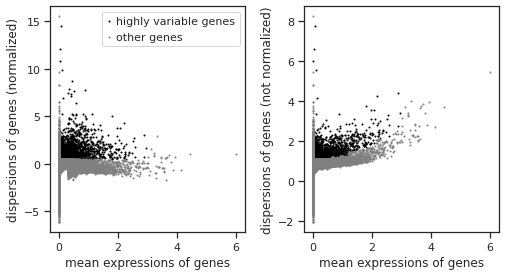

highly_variable
False    29760
True      3778
Name: count, dtype: int64

In [23]:
sc.pp.highly_variable_genes(adata_neuron, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata_neuron)
adata_neuron.var['highly_variable'].value_counts()

In [25]:
hvg_L = adata_neuron.var[ 
        (adata_neuron.var.means > 0.0125) & 
        (adata_neuron.var.means <= 3 ) ].dispersions_norm.sort_values(ascending=False)[:3000].index.to_list()
print('hvg #: ', len(hvg_L))
adata_neuron.var['highly_variable']= [True if var in hvg_L else False for var in adata_neuron.var_names ]
adata_neuron.var['highly_variable'].value_counts()

hvg #:  3000


highly_variable
False    30538
True      3000
Name: count, dtype: int64

In [26]:
adata_neuron.raw = adata_neuron

In [27]:
adata_neuron

AnnData object with n_obs × n_vars = 1372929 × 33538
    obs: 'cell_type_high_resolution', 'subject', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'msex', 'age_death', 'pmi', 'race', 'Pathologic_diagnosis_of_AD', 'expBatch', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.2', 'leiden_1.4', 'leiden_1.6', 'leiden_1.8', 'leiden_2.0', 'leiden_2.2', 'X_umap_1', 'X_umap_2', 'annotation_broad', 'cellType_pathology', 'batch'
    var: 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_umap'
    layers: 'counts'

In [28]:
adata_neuron = adata_neuron[:, adata_neuron.var.highly_variable]

# sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])
sc.pp.scale(adata_neuron, max_value=10)

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [29]:
adata_neuron

AnnData object with n_obs × n_vars = 1372929 × 3000
    obs: 'cell_type_high_resolution', 'subject', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'msex', 'age_death', 'pmi', 'race', 'Pathologic_diagnosis_of_AD', 'expBatch', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.2', 'leiden_1.4', 'leiden_1.6', 'leiden_1.8', 'leiden_2.0', 'leiden_2.2', 'X_umap_1', 'X_umap_2', 'annotation_broad', 'cellType_pathology', 'batch'
    var: 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg'
    obsm: 'X_umap'
    layers: 'counts'

In [30]:
adata_neuron.obs

cell_type_high_resolution       subject  \
index                                                              
AACGTTGGTTCAGGCC-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGACCTAGTTAACGA-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGTCTGTCCTCAATT-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGAGTATGACA-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGTCCTTTCTC-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
...                                            ...           ...   
TTGGGATTCCTAACAG-16-14-1            Inh VIP ABI3BP  ROSMAP-37074   
TTGTGTTTCATCACCC-16-14-1            Inh PVALB HTR4  ROSMAP-37074   
TTTACCAAGCACTCCG-16-14-1            Inh L6 SST NPY  ROSMAP-37074   
TTTCACAAGCTAGATA-16-14-1            Inh PVALB HTR4  ROSMAP-37074   
TTTCAGTGTGGTAATA-16-14-1         Inh L3-5 SST MAFB  ROSMAP-37074   

                          n_genes_by_counts  total_counts  total_counts_mt  \
index                                                                        
AACGTTGGTTCAGGCC-1-0-0               5712.0       16686.0             67.0   
AAGACCTAGTTAACGA-1-0-0               3995.0        9008.0            137.0   
AAGTCTGTCCTCAATT-1-0-0               5178.0       13972.0            244.0   
AATCCAGAGTATGACA-1-0-0               5365.0       14824.0             79.0   
AATCCAGTCCTTTCTC-1-0-0               6597.0       25400.0            294.0   
...                                     ...           ...              ...   
TTGGGATTCCTAACAG-16-14-1                NaN           NaN              NaN   
TTGTGTTTCATCACCC-16-14-1                NaN           NaN              NaN   
TTTACCAAGCACTCCG-16-14-1                NaN           NaN              NaN   
TTTCACAAGCTAGATA-16-14-1                NaN           NaN              NaN   
TTTCAGTGTGGTAATA-16-14-1                NaN           NaN              NaN   

                          pct_counts_mt leiden  msex age_death  pmi  ...  \
index                                                                ...   
AACGTTGGTTCAGGCC-1-0-0         0.401534      3     1   (80,85]  1.0  ...   
AAGACCTAGTTAACGA-1-0-0         1.520870      3     1   (80,85]  1.0  ...   
AAGTCTGTCCTCAATT-1-0-0         1.746350      3     1   (80,85]  1.0  ...   
AATCCAGAGTATGACA-1-0-0         0.532920      3     1   (80,85]  1.0  ...   
AATCCAGTCCTTTCTC-1-0-0         1.157480      3     1   (80,85]  1.0  ...   
...                                 ...    ...   ...       ...  ...  ...   
TTGGGATTCCTAACAG-16-14-1            NaN    NaN     0       90+  6.0  ...   
TTGTGTTTCATCACCC-16-14-1            NaN    NaN     0       90+  6.0  ...   
TTTACCAAGCACTCCG-16-14-1            NaN    NaN     0       90+  6.0  ...   
TTTCACAAGCTAGATA-16-14-1            NaN    NaN     0       90+  6.0  ...   
TTTCAGTGTGGTAATA-16-14-1            NaN    NaN     0       90+  6.0  ...   

                          leiden_1.4 leiden_1.6 leiden_1.8 leiden_2.0  \
index                                                                   
AACGTTGGTTCAGGCC-1-0-0             3          3         15         15   
AAGACCTAGTTAACGA-1-0-0             3          3         15          6   
AAGTCTGTCCTCAATT-1-0-0             3          3         15         15   
AATCCAGAGTATGACA-1-0-0             3          3         15         15   
AATCCAGTCCTTTCTC-1-0-0             3          3         15         15   
...                              ...        ...        ...        ...   
TTGGGATTCCTAACAG-16-14-1         NaN        NaN        NaN        NaN   
TTGTGTTTCATCACCC-16-14-1         NaN        NaN        NaN        NaN   
TTTACCAAGCACTCCG-16-14-1         NaN        NaN        NaN        NaN   
TTTCACAAGCTAGATA-16-14-1         NaN        NaN        NaN        NaN   
TTTCAGTGTGGTAATA-16-14-1         NaN        NaN        NaN        NaN   

                         leiden_2.2   X_umap_1  X_umap_2 annotation_broad  \
index                                                                       
AACGTTGGTTCAGGCC-1-0-0          

In [31]:
sc.tl.pca(adata_neuron, svd_solver="arpack", n_comps=150) # Memory error
sc.pl.pca_variance_ratio(adata_neuron, log=True, n_pcs=150)

computing PCA
    on highly variable genes


MemoryError: Unable to allocate 42.9 GiB for an array with shape (5751405830,) and data type int64

In [19]:
adata_neuron.write(f'{tsai2023_Folder}/adata_tsai2023_Folder__2.exc_inh_neurons__HVG_PCA.h5ad')

NameError: name 'adata_exci' is not defined

# Genes associated with Neurodegeneration

In [13]:
adata_neuron = sc.read(f'{tsai2023_Folder}/adata_tsai2023_Folder__1.concat_exc_inh_neurons.h5ad')

In [14]:
adata_neuron.obs

cell_type_high_resolution       subject  \
index                                                              
AACGTTGGTTCAGGCC-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGACCTAGTTAACGA-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AAGTCTGTCCTCAATT-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGAGTATGACA-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
AATCCAGTCCTTTCTC-1-0-0    Exc L2-3 CBLN2 LINC02306  ROSMAP-52226   
...                                            ...           ...   
TTGGGATTCCTAACAG-16-14-1            Inh VIP ABI3BP  ROSMAP-37074   
TTGTGTTTCATCACCC-16-14-1            Inh PVALB HTR4  ROSMAP-37074   
TTTACCAAGCACTCCG-16-14-1            Inh L6 SST NPY  ROSMAP-37074   
TTTCACAAGCTAGATA-16-14-1            Inh PVALB HTR4  ROSMAP-37074   
TTTCAGTGTGGTAATA-16-14-1         Inh L3-5 SST MAFB  ROSMAP-37074   

                          n_genes_by_counts  total_counts  total_counts_mt  \
index                                                                        
AACGTTGGTTCAGGCC-1-0-0               5712.0       16686.0             67.0   
AAGACCTAGTTAACGA-1-0-0               3995.0        9008.0            137.0   
AAGTCTGTCCTCAATT-1-0-0               5178.0       13972.0            244.0   
AATCCAGAGTATGACA-1-0-0               5365.0       14824.0             79.0   
AATCCAGTCCTTTCTC-1-0-0               6597.0       25400.0            294.0   
...                                     ...           ...              ...   
TTGGGATTCCTAACAG-16-14-1                NaN           NaN              NaN   
TTGTGTTTCATCACCC-16-14-1                NaN           NaN              NaN   
TTTACCAAGCACTCCG-16-14-1                NaN           NaN              NaN   
TTTCACAAGCTAGATA-16-14-1                NaN           NaN              NaN   
TTTCAGTGTGGTAATA-16-14-1                NaN           NaN              NaN   

                          pct_counts_mt leiden  msex age_death  pmi  ...  \
index                                                                ...   
AACGTTGGTTCAGGCC-1-0-0         0.401534      3     1   (80,85]  1.0  ...   
AAGACCTAGTTAACGA-1-0-0         1.520870      3     1   (80,85]  1.0  ...   
AAGTCTGTCCTCAATT-1-0-0         1.746350      3     1   (80,85]  1.0  ...   
AATCCAGAGTATGACA-1-0-0         0.532920      3     1   (80,85]  1.0  ...   
AATCCAGTCCTTTCTC-1-0-0         1.157480      3     1   (80,85]  1.0  ...   
...                                 ...    ...   ...       ...  ...  ...   
TTGGGATTCCTAACAG-16-14-1            NaN    NaN     0       90+  6.0  ...   
TTGTGTTTCATCACCC-16-14-1            NaN    NaN     0       90+  6.0  ...   
TTTACCAAGCACTCCG-16-14-1            NaN    NaN     0       90+  6.0  ...   
TTTCACAAGCTAGATA-16-14-1            NaN    NaN     0       90+  6.0  ...   
TTTCAGTGTGGTAATA-16-14-1            NaN    NaN     0       90+  6.0  ...   

                          leiden_1.4 leiden_1.6 leiden_1.8 leiden_2.0  \
index                                                                   
AACGTTGGTTCAGGCC-1-0-0             3          3         15         15   
AAGACCTAGTTAACGA-1-0-0             3          3         15          6   
AAGTCTGTCCTCAATT-1-0-0             3          3         15         15   
AATCCAGAGTATGACA-1-0-0             3          3         15         15   
AATCCAGTCCTTTCTC-1-0-0             3          3         15         15   
...                              ...        ...        ...        ...   
TTGGGATTCCTAACAG-16-14-1         NaN        NaN        NaN        NaN   
TTGTGTTTCATCACCC-16-14-1         NaN        NaN        NaN        NaN   
TTTACCAAGCACTCCG-16-14-1         NaN        NaN        NaN        NaN   
TTTCACAAGCTAGATA-16-14-1         NaN        NaN        NaN        NaN   
TTTCAGTGTGGTAATA-16-14-1         NaN        NaN        NaN        NaN   

                         leiden_2.2   X_umap_1  X_umap_2 annotation_broad  \
index                                                                       
AACGTTGGTTCAGGCC-1-0-0          

In [15]:
adata_neuron.obs.annotation_broad.value_counts()

annotation_broad
Exc neuron          1014574
Inh neuron           329699
APP-high cluster      28656
Name: count, dtype: int64

In [21]:
with rc_context({'figure.figsize': (3.5, 3)}):
    sc.pl.violin(adata_neuron, keys=['APP', 'SNCA', 'NRGN'], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, show=False,
                 save='_adata_2023_Cell_Tsai__neuron__APP_SNCA_NRGN.pdf')
    sc.pl.violin(adata_neuron, keys=['APP', 'SNCA', 'NRGN'], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, show=False,
                 save='_adata_2023_Cell_Tsai__neuron__APP_SNCA_NRGN.png')
    
    sc.pl.violin(adata_neuron, keys=['NEFL', 'SV2A', 'SNAP25', 'GAP43'], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, show=False,
                 save='_adata_2023_Cell_Tsai__neuron__NEFL_SV2A_SNAP25_GAP43.pdf')
    sc.pl.violin(adata_neuron, keys=['NEFL', 'SV2A', 'SNAP25', 'GAP43'], groupby='annotation_broad', rotation=90, palette = 'Set2', size=0, show=False,
                 save='_adata_2023_Cell_Tsai__neuron__NEFL_SV2A_SNAP25_GAP43.png')
    
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{tsai2023Pic_Folder}/{x}')

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcor

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/s

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcor

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/s

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


# Median age

In [13]:
batch_Df = pd.read_csv('/data/tcl/dataset/Human_AD/2023_Cell_Tsai/batch_mapping_deidentified.tsv', sep='\t')
subjectToDataset_D = dict(zip(batch_Df.subject, batch_Df.dataset))
datasetToSubject_D = dict(zip(batch_Df.dataset, batch_Df.subject))
batch_Df

num         batch         dataset       subject
0      1  SM_171013Tsa  SM_171013Tsa-1  ROSMAP-52226
1      2  SM_171013Tsa  SM_171013Tsa-2  ROSMAP-72912
2      3  SM_171013Tsa  SM_171013Tsa-3  ROSMAP-66835
3      4  SM_171013Tsa  SM_171013Tsa-4  ROSMAP-90257
4      5  SM_171013Tsa  SM_171013Tsa-5  ROSMAP-38740
..   ...           ...             ...           ...
475   44         MRPFC        MRPFC-44  ROSMAP-78104
476   45         MRPFC        MRPFC-45  ROSMAP-17199
477   46         MRPFC        MRPFC-46  ROSMAP-53808
478   47         MRPFC        MRPFC-47  ROSMAP-42444
479   48         MRPFC        MRPFC-48  ROSMAP-51356

[480 rows x 4 columns]

In [14]:
subjectToDataset_D

{'ROSMAP-52226': 'SM_171013Tsa-1',
 'ROSMAP-72912': 'SM_171013Tsa-2',
 'ROSMAP-66835': 'SM_171013Tsa-3',
 'ROSMAP-90257': 'SM_171013Tsa-4',
 'ROSMAP-38740': 'SM_171013Tsa-5',
 'ROSMAP-70347': 'SM_171013Tsa-6',
 'ROSMAP-54289': 'SM_171013Tsa-7',
 'ROSMAP-83625': 'SM_171013Tsa-8',
 'ROSMAP-61943': 'SM_171013Tsa-9',
 'ROSMAP-25704': 'SM_171013Tsa-10',
 'ROSMAP-93570': 'SM_171013Tsa-11',
 'ROSMAP-16437': 'SM_171013Tsa-12',
 'ROSMAP-88138': 'SM_171013Tsa-13',
 'ROSMAP-29771': 'SM_171013Tsa-14',
 'ROSMAP-44543': 'SM_171013Tsa-15',
 'ROSMAP-79332': 'SM_171013Tsa-16',
 'ROSMAP-30449': 'SM_171013Tsa-17',
 'ROSMAP-94966': 'SM_171013Tsa-18',
 'ROSMAP-45804': 'SM_171013Tsa-19',
 'ROSMAP-18944': 'SM_171013Tsa-20',
 'ROSMAP-66282': 'SM_171013Tsa-21',
 'ROSMAP-21964': 'SM_171013Tsa-22',
 'ROSMAP-62503': 'SM_171013Tsa-23',
 'ROSMAP-78083': 'SM_171013Tsa-24',
 'ROSMAP-28519': 'SM_171013Tsa-25',
 'ROSMAP-63641': 'SM_171013Tsa-26',
 'ROSMAP-12562': 'SM_171013Tsa-27',
 'ROSMAP-80730': 'SM_171013Tsa-28',
 

In [15]:
datasetToSubject_D

{'SM_171013Tsa-1': 'ROSMAP-52226',
 'SM_171013Tsa-2': 'ROSMAP-72912',
 'SM_171013Tsa-3': 'ROSMAP-66835',
 'SM_171013Tsa-4': 'ROSMAP-90257',
 'SM_171013Tsa-5': 'ROSMAP-38740',
 'SM_171013Tsa-6': 'ROSMAP-70347',
 'SM_171013Tsa-7': 'ROSMAP-54289',
 'SM_171013Tsa-8': 'ROSMAP-83625',
 'SM_171013Tsa-9': 'ROSMAP-61943',
 'SM_171013Tsa-10': 'ROSMAP-25704',
 'SM_171013Tsa-11': 'ROSMAP-93570',
 'SM_171013Tsa-12': 'ROSMAP-16437',
 'SM_171013Tsa-13': 'ROSMAP-88138',
 'SM_171013Tsa-14': 'ROSMAP-29771',
 'SM_171013Tsa-15': 'ROSMAP-44543',
 'SM_171013Tsa-16': 'ROSMAP-79332',
 'SM_171013Tsa-17': 'ROSMAP-30449',
 'SM_171013Tsa-18': 'ROSMAP-94966',
 'SM_171013Tsa-19': 'ROSMAP-45804',
 'SM_171013Tsa-20': 'ROSMAP-18944',
 'SM_171013Tsa-21': 'ROSMAP-66282',
 'SM_171013Tsa-22': 'ROSMAP-21964',
 'SM_171013Tsa-23': 'ROSMAP-62503',
 'SM_171013Tsa-24': 'ROSMAP-78083',
 'SM_171013Tsa-25': 'ROSMAP-28519',
 'SM_171013Tsa-26': 'ROSMAP-63641',
 'SM_171013Tsa-27': 'ROSMAP-12562',
 'SM_171013Tsa-28': 'ROSMAP-80730',
 

In [16]:
individual_Df = pd.read_csv('/data/tcl/dataset/Human_AD/2023_Cell_Tsai/individual_metadata_deidentified.tsv', sep='\t')
individual_Df

subject  msex age_death   pmi  race Pathologic_diagnosis_of_AD
0    ROSMAP-10132     0       90+   7.0     1                        yes
1    ROSMAP-10643     0       90+  13.0     1                        yes
2    ROSMAP-10859     1   (80,85]  14.0     2                        yes
3    ROSMAP-12078     1   (85,90]   3.0     1                        yes
4    ROSMAP-12256     1   (85,90]   4.0     1                        yes
..            ...   ...       ...   ...   ...                        ...
422  ROSMAP-98582     1   (70,75]   8.0     1                         no
423  ROSMAP-98683     0   (85,90]   7.0     1                        yes
424  ROSMAP-99419     0   (75,80]   8.0     1                         no
425  ROSMAP-99585     1       90+   2.0     1                        yes
426  ROSMAP-99981     1       90+   5.0     1                        yes

[427 rows x 6 columns]

In [17]:
cell2023_Df = pd.read_csv('/data/tcl/dataset/Human_AD/2023_Cell_Tsai/2023_Cell_476_clinical.csv')
cell2023_Df

Unnamed: 0    projid          dataset  ncell         batch study  \
0    SM_190312Tsa-48   1211411  SM_190312Tsa-48   2161  SM_190312Tsa  ROS    
1    SM_190312Tsa-27   2899847  SM_190312Tsa-27   1075  SM_190312Tsa  MAP    
2        SM_GZQS1-21   3713990      SM_GZQS1-21   2337      SM_GZQS1  MAP    
3        SM_IXFTR-24   3889845      SM_IXFTR-24   4826      SM_IXFTR  MAP    
4        SM_IXFTQ-25   6107196      SM_IXFTQ-25    418      SM_IXFTQ  MAP    
..               ...       ...              ...    ...           ...   ...   
471  SM_190312Tsa-14  94974890  SM_190312Tsa-14    889  SM_190312Tsa  MAP    
472       SM_IT6ME-7  95491648       SM_IT6ME-7   1402      SM_IT6ME  MAP    
473  SM_190312Tsa-42  95919181  SM_190312Tsa-42   1699  SM_190312Tsa  MAP    
474   SM_190312Tsa-8  96095092   SM_190312Tsa-8   3701  SM_190312Tsa  MAP    
475  SM_190312Tsa-40  98953007  SM_190312Tsa-40   4778  SM_190312Tsa  MAP    

    scaled_to  agreeableness  conscientiousness  extraversion_6  ...  \
0      ROSMAP           27.0               28.0            12.0  ...   
1      ROSMAP            NaN                NaN            15.0  ...   
2      ROSMAP            NaN                NaN            16.0  ...   
3      ROSMAP            NaN               32.0            21.0  ...   
4      ROSMAP            NaN                NaN            16.0  ...   
..        ...            ...                ...             ...  ...   
471    ROSMAP            NaN               33.0            12.0  ...   
472    ROSMAP            NaN               30.0            18.0  ...   
473    ROSMAP            NaN                NaN             NaN  ...   
474    ROSMAP            NaN               30.0            14.0  ...   
475    ROSMAP            NaN                NaN            12.0  ...   

      kra.avg  braaksc.ad  nrad  cogdxad  Apoe_e4  any.nft  any.plaq_n  \
0         NaN        CTRL  CTRL       AD       no    False       False   
1         NaN        CTRL  CTRL     CTRL       no    False        True   
2         NaN        CTRL    AD     CTRL       no     True        True   
3    0.028106        CTRL    AD     CTRL      yes     True        True   
4         NaN          AD    AD       AD       no     True        True   
..        ...         ...   ...      ...      ...      ...         ...   
471  0.026122        CTRL  CTRL     CTRL       no    False        True   
472  0.026598        CTRL  CTRL     CTRL       no    False       False   
473       NaN        CTRL    AD     CTRL       no    False        True   
474  0.025655        CTRL  CTRL     CTRL       no    False       False   
475  0.031742        CTRL    AD       AD      yes    False        True   

     any.plaq_d    dlbdx_lbl  dxpark_lbl  
0          True  Neocortical          No  
1          True  Neocortical         Yes  
2          True           No          No  
3          True           No          No  
4          True           No         Yes  
..          ...          ...         ...  
471        True           No          No  
472       False           No          No  
473        True           No          No  
474       False       Limbic         Yes  
475        True           No          No  

[476 rows x 184 columns]

In [18]:
rosmap_L = individual_Df.subject.to_list()
len(rosmap_L)

427

In [19]:
cell2023_Df['subject'] = pd.Categorical([datasetToSubject_D[dataset] for dataset in cell2023_Df.dataset])

In [20]:
cell2023_Df

Unnamed: 0    projid          dataset  ncell         batch study  \
0    SM_190312Tsa-48   1211411  SM_190312Tsa-48   2161  SM_190312Tsa  ROS    
1    SM_190312Tsa-27   2899847  SM_190312Tsa-27   1075  SM_190312Tsa  MAP    
2        SM_GZQS1-21   3713990      SM_GZQS1-21   2337      SM_GZQS1  MAP    
3        SM_IXFTR-24   3889845      SM_IXFTR-24   4826      SM_IXFTR  MAP    
4        SM_IXFTQ-25   6107196      SM_IXFTQ-25    418      SM_IXFTQ  MAP    
..               ...       ...              ...    ...           ...   ...   
471  SM_190312Tsa-14  94974890  SM_190312Tsa-14    889  SM_190312Tsa  MAP    
472       SM_IT6ME-7  95491648       SM_IT6ME-7   1402      SM_IT6ME  MAP    
473  SM_190312Tsa-42  95919181  SM_190312Tsa-42   1699  SM_190312Tsa  MAP    
474   SM_190312Tsa-8  96095092   SM_190312Tsa-8   3701  SM_190312Tsa  MAP    
475  SM_190312Tsa-40  98953007  SM_190312Tsa-40   4778  SM_190312Tsa  MAP    

    scaled_to  agreeableness  conscientiousness  extraversion_6  ...  \
0      ROSMAP           27.0               28.0            12.0  ...   
1      ROSMAP            NaN                NaN            15.0  ...   
2      ROSMAP            NaN                NaN            16.0  ...   
3      ROSMAP            NaN               32.0            21.0  ...   
4      ROSMAP            NaN                NaN            16.0  ...   
..        ...            ...                ...             ...  ...   
471    ROSMAP            NaN               33.0            12.0  ...   
472    ROSMAP            NaN               30.0            18.0  ...   
473    ROSMAP            NaN                NaN             NaN  ...   
474    ROSMAP            NaN               30.0            14.0  ...   
475    ROSMAP            NaN                NaN            12.0  ...   

     braaksc.ad  nrad  cogdxad  Apoe_e4  any.nft  any.plaq_n  any.plaq_d  \
0          CTRL  CTRL       AD       no    False       False        True   
1          CTRL  CTRL     CTRL       no    False        True        True   
2          CTRL    AD     CTRL       no     True        True        True   
3          CTRL    AD     CTRL      yes     True        True        True   
4            AD    AD       AD       no     True        True        True   
..          ...   ...      ...      ...      ...         ...         ...   
471        CTRL  CTRL     CTRL       no    False        True        True   
472        CTRL  CTRL     CTRL       no    False       False       False   
473        CTRL    AD     CTRL       no    False        True        True   
474        CTRL  CTRL     CTRL       no    False       False       False   
475        CTRL    AD       AD      yes    False        True        True   

       dlbdx_lbl  dxpark_lbl       subject  
0    Neocortical          No  ROSMAP-45310  
1    Neocortical         Yes  ROSMAP-34387  
2             No          No  ROSMAP-69520  
3             No          No  ROSMAP-53306  
4             No         Yes  ROSMAP-79585  
..           ...         ...           ...  
471           No          No  ROSMAP-70868  
472           No          No  ROSMAP-73883  
473           No          No  ROSMAP-35817  
474       Limbic         Yes  ROSMAP-82525  
475           No          No  ROSMAP-32686  

[476 rows x 185 columns]

In [21]:
individual_Df[individual_Df.subject.duplicated()]

Empty DataFrame
Columns: [subject, msex, age_death, pmi, race, Pathologic_diagnosis_of_AD]
Index: []

In [22]:
len(cell2023_Df[cell2023_Df.subject.duplicated()].index)

50

In [77]:
480 - 50 + 1 

430

In [24]:
nonDup_L = cell2023_Df[~cell2023_Df.subject.duplicated()].subject.to_list()

In [25]:
set(rosmap_L) - set(nonDup_L)

{'ROSMAP-51607'}

In [29]:
batch_Df[batch_Df.subject == 'ROSMAP-51607']

num         batch          dataset       subject
34   35  SM_171013Tsa  SM_171013Tsa-35  ROSMAP-51607

In [26]:
cell2023_Df[cell2023_Df.subject == 'ROSMAP-51607']

Empty DataFrame
Columns: [Unnamed: 0, projid, dataset, ncell, batch, study, scaled_to, agreeableness, conscientiousness, extraversion_6, neo_altruism, neo_trust, neuroticism_12, openness, neuroticism_48, neuroticism_6, apoe_genotype, clin_dlb, cogdx, cogdx_stroke, dxpark, cogn_ep_lv, cogn_po_lv, cogn_ps_lv, cogn_se_lv, cogn_wo_lv, cognep_random_slope, cogng_random_slope, cognpo_random_slope, cognps_random_slope, cognse_random_slope, cognwo_random_slope, cogn_global_lv, age_bl, age_death, educ, msex, race, spanish, agefirst, agelast, menoage, mensage, natura, othspe00, whatwas, alcohol_g_bl, ldai_bl, q3smo_bl, q4smo_bl, smoking, chd_cogact_freq, lifetime_cogact_freq_bl, ma_adult_cogact_freq, ya_adult_cogact_freq, phys5itemsum_bl, phys5itemsum_lv, soc_net_bl, social_isolation_avg, social_isolation_lv, hypertension_bl, cancer_bl, diabetes_sr_rx_bl, headinjrloc_bl, thyroid_bl, chf_bl, claudication_bl, heart_bl, stroke_bl, lipid_lowering_nonstatin_rx_bl, lipid_lowering_nonstatin_rx_ever, statin_rx_bl, statin_rx_ever, bradysc_lv, gaitsc_lv, parksc_lv, rigidsc_lv, tremsc_lv, braaksc, ceradsc, gpath, gpath_3neocort, niareagansc, plaq_d_ag, plaq_d_ec, plaq_d_hip, plaq_d_mf, plaq_d_mt, fixation_interval, pmi, amyloid, plaq_d, plaq_n, plaq_n_ag, plaq_n_ec, plaq_n_hip, plaq_n_mf, plaq_n_mt, hspath_typ, dlbdx, ...]
Index: []

[0 rows x 185 columns]

In [30]:
cell2023_Df[cell2023_Df.dataset == 'SM_171013Tsa-35']

Empty DataFrame
Columns: [Unnamed: 0, projid, dataset, ncell, batch, study, scaled_to, agreeableness, conscientiousness, extraversion_6, neo_altruism, neo_trust, neuroticism_12, openness, neuroticism_48, neuroticism_6, apoe_genotype, clin_dlb, cogdx, cogdx_stroke, dxpark, cogn_ep_lv, cogn_po_lv, cogn_ps_lv, cogn_se_lv, cogn_wo_lv, cognep_random_slope, cogng_random_slope, cognpo_random_slope, cognps_random_slope, cognse_random_slope, cognwo_random_slope, cogn_global_lv, age_bl, age_death, educ, msex, race, spanish, agefirst, agelast, menoage, mensage, natura, othspe00, whatwas, alcohol_g_bl, ldai_bl, q3smo_bl, q4smo_bl, smoking, chd_cogact_freq, lifetime_cogact_freq_bl, ma_adult_cogact_freq, ya_adult_cogact_freq, phys5itemsum_bl, phys5itemsum_lv, soc_net_bl, social_isolation_avg, social_isolation_lv, hypertension_bl, cancer_bl, diabetes_sr_rx_bl, headinjrloc_bl, thyroid_bl, chf_bl, claudication_bl, heart_bl, stroke_bl, lipid_lowering_nonstatin_rx_bl, lipid_lowering_nonstatin_rx_ever, statin_rx_bl, statin_rx_ever, bradysc_lv, gaitsc_lv, parksc_lv, rigidsc_lv, tremsc_lv, braaksc, ceradsc, gpath, gpath_3neocort, niareagansc, plaq_d_ag, plaq_d_ec, plaq_d_hip, plaq_d_mf, plaq_d_mt, fixation_interval, pmi, amyloid, plaq_d, plaq_n, plaq_n_ag, plaq_n_ec, plaq_n_hip, plaq_n_mf, plaq_n_mt, hspath_typ, dlbdx, ...]
Index: []

[0 rows x 185 columns]

In [33]:
individual_Df[individual_Df.subject == 'ROSMAP-51607']

subject  msex age_death   pmi  race Pathologic_diagnosis_of_AD
200  ROSMAP-51607     1   (80,85]  22.0     1                         no

In [32]:
len(cell2023_Df.subject.cat.categories)

426

In [ ]:
cell2023_Df

In [36]:
nonDup_Df = cell2023_Df[~cell2023_Df.subject.duplicated()]
nonDup_Df

Unnamed: 0    projid          dataset  ncell         batch study  \
0    SM_190312Tsa-48   1211411  SM_190312Tsa-48   2161  SM_190312Tsa  ROS    
1    SM_190312Tsa-27   2899847  SM_190312Tsa-27   1075  SM_190312Tsa  MAP    
2        SM_GZQS1-21   3713990      SM_GZQS1-21   2337      SM_GZQS1  MAP    
3        SM_IXFTR-24   3889845      SM_IXFTR-24   4826      SM_IXFTR  MAP    
4        SM_IXFTQ-25   6107196      SM_IXFTQ-25    418      SM_IXFTQ  MAP    
..               ...       ...              ...    ...           ...   ...   
471  SM_190312Tsa-14  94974890  SM_190312Tsa-14    889  SM_190312Tsa  MAP    
472       SM_IT6ME-7  95491648       SM_IT6ME-7   1402      SM_IT6ME  MAP    
473  SM_190312Tsa-42  95919181  SM_190312Tsa-42   1699  SM_190312Tsa  MAP    
474   SM_190312Tsa-8  96095092   SM_190312Tsa-8   3701  SM_190312Tsa  MAP    
475  SM_190312Tsa-40  98953007  SM_190312Tsa-40   4778  SM_190312Tsa  MAP    

    scaled_to  agreeableness  conscientiousness  extraversion_6  ...  \
0      ROSMAP           27.0               28.0            12.0  ...   
1      ROSMAP            NaN                NaN            15.0  ...   
2      ROSMAP            NaN                NaN            16.0  ...   
3      ROSMAP            NaN               32.0            21.0  ...   
4      ROSMAP            NaN                NaN            16.0  ...   
..        ...            ...                ...             ...  ...   
471    ROSMAP            NaN               33.0            12.0  ...   
472    ROSMAP            NaN               30.0            18.0  ...   
473    ROSMAP            NaN                NaN             NaN  ...   
474    ROSMAP            NaN               30.0            14.0  ...   
475    ROSMAP            NaN                NaN            12.0  ...   

     braaksc.ad  nrad  cogdxad  Apoe_e4  any.nft  any.plaq_n  any.plaq_d  \
0          CTRL  CTRL       AD       no    False       False        True   
1          CTRL  CTRL     CTRL       no    False        True        True   
2          CTRL    AD     CTRL       no     True        True        True   
3          CTRL    AD     CTRL      yes     True        True        True   
4            AD    AD       AD       no     True        True        True   
..          ...   ...      ...      ...      ...         ...         ...   
471        CTRL  CTRL     CTRL       no    False        True        True   
472        CTRL  CTRL     CTRL       no    False       False       False   
473        CTRL    AD     CTRL       no    False        True        True   
474        CTRL  CTRL     CTRL       no    False       False       False   
475        CTRL    AD       AD      yes    False        True        True   

       dlbdx_lbl  dxpark_lbl       subject  
0    Neocortical          No  ROSMAP-45310  
1    Neocortical         Yes  ROSMAP-34387  
2             No          No  ROSMAP-69520  
3             No          No  ROSMAP-53306  
4             No         Yes  ROSMAP-79585  
..           ...         ...           ...  
471           No          No  ROSMAP-70868  
472           No          No  ROSMAP-73883  
473           No          No  ROSMAP-35817  
474       Limbic         Yes  ROSMAP-82525  
475           No          No  ROSMAP-32686  

[426 rows x 185 columns]

In [38]:
nonDup_Df.age_death.median()

87.861738535

In [71]:
cell2023_Df[cell2023_Df.subject == 'ROSMAP-52212']#.age_death

Unnamed: 0    projid         dataset  ncell         batch study  \
461        MRPFC-30  91444029        MRPFC-30   2244         MRPFC  MAP    
462  SM_190312Tsa-7  91444029  SM_190312Tsa-7   2279  SM_190312Tsa  MAP    

    scaled_to  agreeableness  conscientiousness  extraversion_6  ...  \
461    ROSMAP            NaN               26.0            12.0  ...   
462    ROSMAP            NaN               26.0            12.0  ...   

     braaksc.ad  nrad  cogdxad  Apoe_e4  any.nft  any.plaq_n  any.plaq_d  \
461        CTRL    AD       AD       no    False        True        True   
462        CTRL    AD       AD       no    False        True        True   

     dlbdx_lbl  dxpark_lbl       subject  
461         No          No  ROSMAP-52212  
462         No          No  ROSMAP-52212  

[2 rows x 185 columns]

In [63]:
cell2023_Df.subject.isin(rosmap_L)

0      True
1      True
2      True
3      True
4      True
       ... 
471    True
472    True
473    True
474    True
475    True
Name: subject, Length: 476, dtype: bool

In [65]:
cell2023_Df.subject.isin(rosmap_L).value_counts()

subject
True    476
Name: count, dtype: int64

In [46]:
# cell2023_Df_batch = 
cell2023_Df.subject.isin(individual_Df['subject'].to_list())
# cell2023_Df_batch

0      True
1      True
2      True
3      True
4      True
       ... 
471    True
472    True
473    True
474    True
475    True
Name: subject, Length: 476, dtype: bool

In [52]:
'SM_190312Tsa-40' in batch_Df['dataset'].to_list()

True

# Finish